# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

Jan_2023 = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-1.parquet')


In [11]:
Jan_2023.shape

(3041714, 19)

In [13]:
Jan_2023.head(4)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5         0.0           0.0   
1             1          7.9   1.00      0.5         4.0           0.0   
2             1         14.9   1.00      0.5        15.0           0.0   
3             1         12.1   7.25      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

**The Above mention way I am unable to load all 12 months data Due to huge value** So I am using another method using the same sampling concept.

In [26]:
df_jan = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-1.parquet')
df_jan['month']=df_jan['tpep_pickup_datetime'].dt.month
df_jan['date']=df_jan['tpep_pickup_datetime'].dt.date
df_jan['hour']=df_jan['tpep_pickup_datetime'].dt.hour
sampled_data = pd.DataFrame()
for date in df_jan['date'].unique():
            every_date=df_jan[df_jan['date']==date]
        # Iterate through each hour of the selected date
            for hour in range(24):
                hoursof_date=every_date[every_date['hour']==hour]
            # Sample 5% of the hourly data randomly
                if not hoursof_date.empty:
            # add data of this hour to the dataframe
                    sample=hoursof_date.sample(frac=0.05,random_state=42)
                    sampled_data=pd.concat([sampled_data,sample])

In [27]:
sampled_data.shape

(152087, 22)

In [28]:
df_feb = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-2.parquet')
df_feb['month']=df_feb['tpep_pickup_datetime'].dt.month
df_feb['date']=df_feb['tpep_pickup_datetime'].dt.date
df_feb['hour']=df_feb['tpep_pickup_datetime'].dt.hour
for date in df_feb['date'].unique():
        every_date=df_feb[df_feb['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [29]:
sampled_data.shape

(320783, 23)

In [30]:
df_mar = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-3.parquet')
df_mar['month']=df_mar['tpep_pickup_datetime'].dt.month
df_mar['date']=df_mar['tpep_pickup_datetime'].dt.date
df_mar['hour']=df_mar['tpep_pickup_datetime'].dt.hour
for date in df_mar['date'].unique():
        every_date=df_mar[df_mar['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [31]:
sampled_data.shape

(484569, 23)

In [32]:
df_Apr = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-4.parquet')
df_Apr['month']=df_Apr['tpep_pickup_datetime'].dt.month
df_Apr['date']=df_Apr['tpep_pickup_datetime'].dt.date
df_Apr['hour']=df_Apr['tpep_pickup_datetime'].dt.hour
for date in df_Apr['date'].unique():
        every_date=df_Apr[df_Apr['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [33]:
sampled_data.shape

(624210, 23)

In [34]:
df_May = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-5.parquet')
df_May['month']=df_May['tpep_pickup_datetime'].dt.month
df_May['date']=df_May['tpep_pickup_datetime'].dt.date
df_May['hour']=df_May['tpep_pickup_datetime'].dt.hour
for date in df_May['date'].unique():
        every_date=df_May[df_May['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [43]:
sampled_data.shape

(768668, 23)

In [46]:
df_Jun = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-6.parquet')
df_Jun['month']=df_Jun['tpep_pickup_datetime'].dt.month
df_Jun['date']=df_Jun['tpep_pickup_datetime'].dt.date
df_Jun['hour']=df_Jun['tpep_pickup_datetime'].dt.hour
for date in df_Jun['date'].unique():
        every_date=df_Jun[df_Jun['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [47]:
df_Jul = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-7.parquet')
df_Jul['month']=df_Jul['tpep_pickup_datetime'].dt.month
df_Jul['date']=df_Jul['tpep_pickup_datetime'].dt.date
df_Jul['hour']=df_Jul['tpep_pickup_datetime'].dt.hour
for date in df_Jul['date'].unique():
        every_date=df_Jul[df_Jul['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [48]:
sampled_data.shape

(1105646, 23)

In [49]:
df_Aug = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-8.parquet')
df_Aug['month']=df_Aug['tpep_pickup_datetime'].dt.month
df_Aug['date']=df_Aug['tpep_pickup_datetime'].dt.date
df_Aug['hour']=df_Aug['tpep_pickup_datetime'].dt.hour
for date in df_Aug['date'].unique():
        every_date=df_Aug[df_Aug['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [50]:
sampled_data.shape

(1249428, 23)

In [51]:
df_Sep = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-9.parquet')
df_Sep['month']=df_Sep['tpep_pickup_datetime'].dt.month
df_Sep['date']=df_Sep['tpep_pickup_datetime'].dt.date
df_Sep['hour']=df_Sep['tpep_pickup_datetime'].dt.hour
for date in df_Sep['date'].unique():
        every_date=df_Sep[df_Sep['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [52]:
sampled_data.shape

(1390303, 23)

In [53]:
df_Oct = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-10.parquet')
df_Oct['month']=df_Oct['tpep_pickup_datetime'].dt.month
df_Oct['date']=df_Oct['tpep_pickup_datetime'].dt.date
df_Oct['hour']=df_Oct['tpep_pickup_datetime'].dt.hour
for date in df_Oct['date'].unique():
        every_date=df_Oct[df_Oct['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [54]:
sampled_data.shape

(1564558, 23)

In [55]:
df_Nov = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-11.parquet')
df_Nov['month']=df_Nov['tpep_pickup_datetime'].dt.month
df_Nov['date']=df_Nov['tpep_pickup_datetime'].dt.date
df_Nov['hour']=df_Nov['tpep_pickup_datetime'].dt.hour
for date in df_Nov['date'].unique():
        every_date=df_Nov[df_Nov['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [56]:
df_Dec = pd.read_parquet(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\trip_records\2023-12.parquet')
df_Dec['month']=df_Dec['tpep_pickup_datetime'].dt.month
df_Dec['date']=df_Dec['tpep_pickup_datetime'].dt.date
df_Dec['hour']=df_Dec['tpep_pickup_datetime'].dt.hour
for date in df_Dec['date'].unique():
        every_date=df_Dec[df_Dec['date']==date]
    # Iterate through each hour of the selected date
        for hour in range(24):
            hoursof_date=every_date[every_date['hour']==hour]
        # Sample 5% of the hourly data randomly
            if not hoursof_date.empty:
        # add data of this hour to the dataframe
                sample=hoursof_date.sample(frac=0.05,random_state=42)
                sampled_data=pd.concat([sampled_data,sample])

In [86]:
sampled_data.shape

(1896400, 23)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [94]:
# Store the df in csv/parquet
import os
folder_path =r"C:\Users\Arun\OneDrive/Desktop/upgrad 2025 new/EDA/EDA Assignment/Starter Notebook - EDA NYC Taxi"
file_name = "df.csv"
os.makedirs(folder_path, exist_ok=True)
file_path = os.path.join(folder_path, file_name)
sampled_data.to_csv(file_path, index=False)

In [15]:
df=pd.read_csv(r"C:\Users\Arun\OneDrive/Desktop/upgrad 2025 new/EDA/EDA Assignment/Starter Notebook - EDA NYC Taxi\df.csv")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [98]:
# Load the new data file


In [16]:
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN                NaN            66           107   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        5.93           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  month        date  hour  \
0         41.15                   0.0         1.25      1  2023-01-01     0   
1         15.48                   2.5         0.00      1  2023-01-01     0   
2         16.40                   2.5         0.00      1  2023-01-01     0   
3         11.50                   2.5         0.00      1  2023-01-01     0   
4         35.57                   NaN          NaN      1  2023-01-01     0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 23 columns]

In [19]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  month                  int64  
 20  date                   object 
 21  hour                   int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [22]:
df.isnull().sum()/len(df)*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
airport_fee              92.170270
month                     0.000000
date                      0.000000
hour                      0.000000
Airport_fee              11.250633
dtype: float64

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [24]:
# Fix the index and drop any columns that are not needed

df = df.sort_index()

In [26]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1896395           0.81         1.0                  N           263   
1896396           5.78         1.0                  N           161   
1896397           1.06         1.0                  N            79   
1896398           0.00         NaN                NaN           166   
1896399           8.45         1.0                  N           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
1896395           262             1  ...        2.44           0.0   
1896396           261             1  ...        4.00           0.0   
1896397           137             1  ...        2.44           0.0   
1896398           244             0  ...        0.00           0.0   
1896399           261             2  ...        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1896395                    1.0         14.64                   2.5   
1896396                    1.0         36.50                   2.5   
1896397                    1.0         14.64                   2.5   
1896398                    1.0         16.14                   NaN   
1896399                    1.0         45.80                   2.5   

         airport_fee  month        date  hour  Airport_fee  
1896395          NaN     12  2023-12-31    23          0.0  
1896396          NaN     12  2023-12-31    23          0.0  
1896397          NaN     12  2023-12-31    23          0.0  
1896398          NaN     12  2023-12-31    23          NaN  
1896399          NaN     12  2023-12-31    23          0.0  

[5 rows x 23 columns]

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'month', 'date',
       'hour', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [32]:
# Combine the two airport fee columns
df['airport_fee_1']=df['airport_fee'].fillna(df['Airport_fee'])


In [34]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'month', 'date',
       'hour', 'Airport_fee', 'airport_fee_1'],
      dtype='object')

In [36]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
airport_fee              1747917
month                          0
date                           0
hour                           0
Airport_fee               213357
airport_fee_1              64874
dtype: int64

In [37]:
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)


In [38]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'hour',
       'airport_fee_1'],
      dtype='object')

In [40]:
df.rename(columns={'airport_fee_1':'Airport_fee'},inplace=True)

In [41]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'hour',
       'Airport_fee'],
      dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative

df[df['fare_amount']<0]



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, date, hour, Airport_fee]
Index: []

[0 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [50]:
df.RatecodeID.value_counts()

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [52]:
# Analyse RatecodeID for the negative fare amounts

df.loc[df['fare_amount']<0,'RatecodeID']
# no negative value for RatecodeID

Series([], Name: RatecodeID, dtype: float64)

In [54]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'hour',
       'Airport_fee'],
      dtype='object')

In [56]:
df.loc[df['Airport_fee']<0,['Airport_fee']].value_counts(normalize=True)

Airport_fee
-1.75          0.733333
-1.25          0.266667
Name: proportion, dtype: float64

In [58]:
df.loc[df['Airport_fee']>=0,'Airport_fee'].mean()

0.14291205458225475

In [60]:
df.loc[df['congestion_surcharge']<0,['congestion_surcharge']].value_counts(normalize=True)

congestion_surcharge
-2.5                    1.0
Name: proportion, dtype: float64

In [62]:
df.loc[df['improvement_surcharge']<0,['improvement_surcharge']].value_counts(normalize=True)

improvement_surcharge
-1.0                     1.0
Name: proportion, dtype: float64

In [64]:
df.loc[df['tolls_amount']<0,['tolls_amount']].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [66]:

df.loc[df['tip_amount']<0,['tip_amount']].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [68]:
df.loc[df['total_amount']<0,['total_amount']].value_counts(normalize=True)

total_amount
-4.00           0.576923
-1.50           0.153846
-3.25           0.089744
-5.75           0.038462
-5.25           0.038462
-3.50           0.038462
-5.00           0.025641
-2.75           0.025641
-1.00           0.012821
Name: proportion, dtype: float64

In [70]:
# Find which columns have negative values
df.loc[df['extra']<0,'extra'].value_counts(normalize=True)

extra
-1.0    0.666667
-2.5    0.333333
Name: proportion, dtype: float64

In [72]:
df.loc[df['mta_tax']<0,'mta_tax'].value_counts(normalize=True)

mta_tax
-0.5    1.0
Name: proportion, dtype: float64

In [74]:
# fix these negative values



In [76]:
negative_cols = ['Airport_fee','congestion_surcharge','improvement_surcharge','total_amount']
for cols in negative_cols:
    mean_values=df.loc[df[cols]>=0,cols].mean()
    df.loc[df[cols]<0,cols]=mean_values


### 


**2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>




**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [81]:
# Find the proportion of missing values in each column

column_list = list(df.columns)

In [83]:




column_list
null_columns = {}
for i in column_list:
    null_values = df[i].isnull().sum()/len(df)
    null_columns[i]=null_values
    print(f'{i} : {null_columns[i]:.2%}')


VendorID : 0.00%
tpep_pickup_datetime : 0.00%
tpep_dropoff_datetime : 0.00%
passenger_count : 3.42%
trip_distance : 0.00%
RatecodeID : 3.42%
store_and_fwd_flag : 3.42%
PULocationID : 0.00%
DOLocationID : 0.00%
payment_type : 0.00%
fare_amount : 0.00%
extra : 0.00%
mta_tax : 0.00%
tip_amount : 0.00%
tolls_amount : 0.00%
improvement_surcharge : 0.00%
total_amount : 0.00%
congestion_surcharge : 3.42%
month : 0.00%
date : 0.00%
hour : 0.00%
Airport_fee : 3.42%


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [85]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.loc[df['passenger_count'].isnull(),'passenger_count']=np.NaN

In [86]:
df[(df['passenger_count']==0)].size

652982

Did you find zeroes in passenger_count? Handle these.

There are some zeroes available in passenger_count

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [92]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.mode()

0    1.0
Name: RatecodeID, dtype: float64

In [94]:
df.loc[df['RatecodeID'].isnull(),'RatecodeID']=np.NaN

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [97]:
# handle null values in congestion_surcharge

df.loc[df['congestion_surcharge'].isnull(),['congestion_surcharge']]=np.NaN


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [100]:
# Handle any remaining missing values
#store_and_fwd_flag
#Airport_fee
print(df.Airport_fee.median())
print(df.Airport_fee.mean())

0.0
0.14291205458225475


In [102]:
df.loc[df['Airport_fee'].isnull(),'Airport_fee']=0.170

In [104]:
df['store_and_fwd_flag'].mode()

0    N
Name: store_and_fwd_flag, dtype: object

In [105]:
df.loc[df['store_and_fwd_flag'].isnull(),['store_and_fwd_flag']]=df['store_and_fwd_flag'].mode()

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [110]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.831526e+06   1.896400e+06  1.831526e+06   
mean   1.733026e+00     1.369215e+00   3.858293e+00  1.634694e+00   
std    4.476401e-01     8.927560e-01   1.294085e+02  7.393915e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896400e+06  1.896400e+06  1.896400e+06           1.896400e+06   
mean   4.952796e-01  3.547011e+00  5.965338e-01           9.990529e-01   
std    4.885128e-02  4.054882e+00  2.187878e+00           2.835735e-02   
min   -5.000000e-01  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.420000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge         month          hour  \
count  1.896400e+06          1.831526e+06  1.896400e+06  1.896400e+06   
mean   2.898320e+01          2.307671e+00  6.540175e+00  1.426504e+01   
std    1.064160e+02          6.661965e-01  3.466800e+00  5.807381e+00   
min    0.000000e+00          0.000000e+00  1.000000e+00  0.000000e+00   
25%    1.596000e+01          2.500000e+00  4.000000e+00  1.100000e+01   
50%    2.100000e+01          2.500000e+00  6.000000e+00  1.500000e+01   
75%    3.094000e+01          2.500000e+00  1.000000e+01  1.900000e+01   
max    1.431675e+05          2.500000e+00  1.200000e+01  2.300000e+01   

        Airport_fee  
count  1.896400e+06  
mean   1.438387e-01  
std    4.568512e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [114]:
invalid_fare = df[(df['trip_distance']<0.01)&(df['fare_amount']>300)]
invalid_fare.head(2)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38085         1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
46484         1  2023-01-11 12:38:54   2023-01-11 12:38:54              0.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
38085            0.0         5.0                  N           141   
46484            0.0        99.0                  N           264   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
38085           141             3  ...      0.0         0.0           0.0   
46484           264             1  ...      0.0         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  month  \
38085                    1.0        1000.0                   0.0      1   
46484                    0.0         450.0                   0.0      1   

             date  hour Airport_fee  
38085  2023-01-09    16         0.0  
46484  2023-01-11    12         0.0  

[2 rows x 22 columns]

In [115]:
print(invalid_fare.shape)

(34, 22)


In [116]:
invalid_zone = df[(df['trip_distance']==0)& (df['fare_amount']==0)&(df['PULocationID']!=df['DOLocationID'])]
invalid_zone.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43681         1  2023-01-10 19:28:41   2023-01-10 20:14:48              1.0   
83048         1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
43681            0.0         1.0                  N           127   
83048            0.0         1.0                  N           161   

       DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
43681            91             1  ...      0.0         0.0           0.0   
83048           264             2  ...      0.0         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  month  \
43681                    0.0           0.0                   0.0      1   
83048                    0.0           0.0                   0.0      1   

             date  hour Airport_fee  
43681  2023-01-10    19         0.0  
83048  2023-01-18    15         0.0  

[2 rows x 22 columns]

In [117]:
long_trips = df[df['trip_distance'] > 250]
long_trips.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30438          2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
111442         2  2023-01-24 06:27:00   2023-01-24 07:18:00              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
30438          721.26         1.0                  N           145   
111442        3253.99         NaN                NaN           230   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
30438              7             1  ...      0.5        2.00           0.0   
111442            90             0  ...      0.5        4.51           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  month  \
30438                     1.0         11.40                   0.0      1   
111442                    0.3         27.05                   NaN      1   

              date  hour Airport_fee  
30438   2023-01-07    20        0.00  
111442  2023-01-24     6        0.17  

[2 rows x 22 columns]

In [118]:
long_trips = df[df['payment_type'] == 0]
long_trips.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4           19.24         NaN                NaN            66           107   
15          10.77         NaN                NaN           151           106   

    payment_type  ...  mta_tax  tip_amount  tolls_amount  \
4              0  ...      0.5        5.93          0.00   
15             0  ...      0.5       11.19          6.55   

    improvement_surcharge  total_amount  congestion_surcharge  month  \
4                     1.0         35.57                   NaN      1   
15                    1.0         67.12                   NaN      1   

          date  hour Airport_fee  
4   2023-01-01     0        0.17  
15  2023-01-01     0        0.17  

[2 rows x 22 columns]

In [119]:
df.shape

(1896400, 22)

In [121]:
df=df[~((df['trip_distance']<0.01)&(df['fare_amount']>300))&
        ~((df['trip_distance']==0)& (df['fare_amount']==0)&(df['PULocationID']!=df['DOLocationID']))&
        ~(df['trip_distance'] > 250)&
        ~(df['payment_type'] == 0)]

In [125]:
df.shape

(1831413, 22)

In [129]:
# remove passenger_count > 6
df=df[~(df['passenger_count']>6)]

In [130]:
df.shape

(1831392, 22)

In [131]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.831392e+06     1.831392e+06   1.831392e+06  1.831392e+06   
mean   1.736326e+00     1.369146e+00   3.444836e+00  1.634048e+00   
std    4.406249e-01     8.924797e-01   4.545772e+00  7.390654e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.780000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.370000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   2.048600e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.831392e+06  1.831392e+06  1.831392e+06  1.831392e+06  1.831392e+06   
mean   1.654589e+02  1.643336e+02  1.205004e+00  1.981709e+01  1.638292e+00   
std    6.367244e+01  6.973985e+01  4.664849e-01  1.073407e+02  1.836118e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00 -2.500000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.831392e+06  1.831392e+06  1.831392e+06           1.831392e+06   
mean   4.953258e-01  3.573525e+00  5.958119e-01           9.993253e-01   
std    4.862796e-02  4.069436e+00  2.183799e+00           2.409202e-02   
min   -5.000000e-01  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.860000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.450000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  2.230800e+02  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge         month          hour  \
count  1.831392e+06          1.831392e+06  1.831392e+06  1.831392e+06   
mean   2.894181e+01          2.307803e+00  6.509368e+00  1.429542e+01   
std    1.082180e+02          6.659870e-01  3.462682e+00  5.776973e+00   
min    0.000000e+00          0.000000e+00  1.000000e+00  0.000000e+00   
25%    1.596000e+01          2.500000e+00  4.000000e+00  1.100000e+01   
50%    2.100000e+01          2.500000e+00  6.000000e+00  1.500000e+01   
75%    3.070000e+01          2.500000e+00  1.000000e+01  1.900000e+01   
max    1.431675e+05          2.500000e+00  1.200000e+01  2.300000e+01   

        Airport_fee  
count  1.831392e+06  
mean   1.429113e-01  
std    4.648429e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00

In [134]:
# Continue with outlier handling
def handling_outlier(df,column):
    Q1 = df[column].quantile(0.25) 
    Q3 =  df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5 * IQR
    upper = Q3+1.5 * IQR
    return df[(df[column]>=lower)&(df[column]<=upper)]
df=handling_outlier(df,'trip_distance')
df =handling_outlier(df,'fare_amount')
df= handling_outlier(df,'total_amount')

In [137]:
df.shape

(1518820, 22)

In [138]:
df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.518820e+06     1.518820e+06   1.518820e+06  1.518820e+06   
mean   1.730854e+00     1.357042e+00   1.807859e+00  1.329341e+00   
std    4.435164e-01     8.895895e-01   1.176125e+00  5.608988e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   9.600000e-01  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.500000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   2.360000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   6.850000e+00  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.518820e+06  1.518820e+06  1.518820e+06  1.518820e+06  1.518820e+06   
mean   1.690430e+02  1.673793e+02  1.206971e+00  1.304669e+01  1.423333e+00   
std    6.499612e+01  6.823734e+01  4.674945e-01  5.812529e+00  1.470991e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00 -2.500000e+00   
25%    1.370000e+02  1.250000e+02  1.000000e+00  8.600000e+00  0.000000e+00   
50%    1.630000e+02  1.630000e+02  1.000000e+00  1.210000e+01  1.000000e+00   
75%    2.340000e+02  2.360000e+02  1.000000e+00  1.630000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  3.130000e+01  1.025000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.518820e+06  1.518820e+06  1.518820e+06           1.518820e+06   
mean   4.988583e-01  2.551528e+00  1.049070e-02           9.995332e-01   
std    2.481143e-02  1.891831e+00  2.740644e-01           1.920346e-02   
min   -5.000000e-01  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.640000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  3.780000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  3.300000e+01  2.735000e+01           1.000000e+00   

       total_amount  congestion_surcharge         month          hour  \
count  1.518820e+06          1.518820e+06  1.518820e+06  1.518820e+06   
mean   2.030672e+01          2.402238e+00  6.474337e+00  1.429040e+01   
std    6.888740e+00          4.845971e-01  3.472498e+00  5.765222e+00   
min    1.000000e+00          0.000000e+00  1.000000e+00  0.000000e+00   
25%    1.512000e+01          2.500000e+00  3.000000e+00  1.100000e+01   
50%    1.910000e+01          2.500000e+00  6.000000e+00  1.500000e+01   
75%    2.450000e+01          2.500000e+00  1.000000e+01  1.900000e+01   
max    3.972000e+01          2.500000e+00  1.200000e+01  2.300000e+01   

        Airport_fee  
count  1.518820e+06  
mean   1.507954e-02  
std    1.567418e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.750000e+00

In [140]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])


In [141]:
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [142]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour

In [144]:
df['drop_hour']=df['tpep_dropoff_datetime'].dt.hour

In [146]:
df['trip_duration']=df['drop_hour'] - df['pickup_hour']

In [147]:
df = df[~(df['trip_duration']<=0)]

In [148]:
df.sort_index(ascending=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6               2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
16              2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17              2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
20              1  2023-01-01 00:58:43   2023-01-01 01:06:07              2.0   
21              2  2023-01-01 00:52:35   2023-01-01 01:14:24              1.0   
...           ...                  ...                   ...              ...   
1896151         2  2023-12-31 22:46:26   2023-12-31 23:08:15              1.0   
1896153         1  2023-12-31 22:51:55   2023-12-31 23:01:14              1.0   
1896160         2  2023-12-31 22:50:43   2023-12-31 23:03:01              1.0   
1896161         1  2023-12-31 22:59:48   2023-12-31 23:04:42              1.0   
1896193         2  2023-12-31 22:56:37   2023-12-31 23:09:56              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6                 1.59         1.0                  N            79   
16                0.74         1.0                  N           229   
17                1.73         1.0                  N           144   
20                1.70         1.0                  N           107   
21                1.83         1.0                  N           164   
...                ...         ...                ...           ...   
1896151           2.26         1.0                  N            68   
1896153           1.70         1.0                  N           114   
1896160           2.99         1.0                  N            88   
1896161           0.60         1.0                  N           237   
1896193           2.97         1.0                  N            87   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
6                 164             1  ...                    1.0         19.68   
16                141             1  ...                    1.0         10.80   
17                113             1  ...                    1.0         19.15   
20                229             1  ...                    1.0         15.30   
21                246             1  ...                    1.0         26.10   
...               ...           ...  ...                    ...           ...   
1896151           211             1  ...                    1.0         28.92   
1896153            90             1  ...                    1.0         18.80   
1896160            34             1  ...                    1.0         25.56   
1896161           263             2  ...                    1.0         10.80   
1896193            97             1  ...                    1.0         21.31   

         congestion_surcharge  month        date  hour  Airport_fee  \
6                         2.5      1  2023-01-01     0          0.0   
16                        2.5      1  2023-01-01     0          0.0   
17                        2.5      1  2023-01-01     0          0.0   
20                        2.5      1  2023-01-01     0          0.0   
21                        2.5      1  2023-01-01     0          0.0   
...                       ...    ...         ...   ...          ...   
1896151                   2.5     12  2023-12-31    22          0.0   
1896153                   2.5     12  2023-12-31    22          0.0   
1896160                   2.5     12  2023-12-31    22          0.0   
1896161                   2.5     12  2023-12-31    22          0.0   
1896193                   2.5     12  2023-12-31    22          0.0   

         pickup_hour  drop_hour trip_duration  
6                  0          1             1  
16                 0          1             1  
17                 0          1             1  
20                 0          1             1  
21                 0          1             1  
...              ...        ...           ...  
1896151           22 

In [157]:
# Do any columns need standardising?
df = df[~(df['passenger_count']==0)]


In [159]:
df.shape

(290256, 25)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [162]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'month',
 'date',
 'hour',
 'Airport_fee',
 'pickup_hour',
 'drop_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.<br>
* `VendorID:`  <font color=blue>Categorical and Nominal Variable</font><br>
* `tpep_pickup_datetime:` <font color=blue>Categorical and time variable</font><br>
* `tpep_dropoff_datetime:` <font color=blue>Categorical and time variable</font><br>
* `passenger_count:` <font color=blue>Numerical and discrete variable</font><br>
* `RatecodeID:` <font color=blue>Categorical and Nominal variable</font><br>
* `trip_distance:`<font color=blue>Numerical and continue variable</font><br>
* `PULocationID:` <font color=blue>Categorical and Nominal variable</font><br>
* `DOLocationID:` <font color=blue>Categorical and Nominal variable</font><br>
* `payment_type:` <font color=blue>Categorical and Nominal variable</font><br>
* `pickup_hour:` <font color=blue>Numerical and discrete variable</font><br>


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

<font color = green> All the monetary parameters Category are - Continuous numerical variables.</font>

In [166]:
Categorical_columns=df.select_dtypes(exclude=['number']).columns
Numerical_columns = df.select_dtypes(include=['number']).columns
print("Categorical_columns : ",Categorical_columns.tolist())
print("Numerical_columns : ",Numerical_columns.tolist())

Categorical_columns :  ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'date']
Numerical_columns :  ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'month', 'hour', 'Airport_fee', 'pickup_hour', 'drop_hour', 'trip_duration']


In [168]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'hour',
       'Airport_fee', 'pickup_hour', 'drop_hour', 'trip_duration'],
      dtype='object')

In [171]:
df['drop_hour']=df['tpep_dropoff_datetime'].dt.hour

In [173]:
Categorise_columns=['VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','pickup_hour','trip_duration']
for i in Categorise_columns:
    print(df.groupby(i).size())

VendorID
1     77034
2    213222
dtype: int64
passenger_count
1.0    223441
2.0     43098
3.0     11004
4.0      6315
5.0      3893
6.0      2505
dtype: int64
trip_distance
0.00    1548
0.01      25
0.02      24
0.03      12
0.04      12
        ... 
6.81      10
6.82      10
6.83      11
6.84       4
6.85       9
Length: 686, dtype: int64
RatecodeID
1.0     287967
2.0          4
3.0          6
4.0         13
5.0        109
99.0      2157
dtype: int64
PULocationID
1         2
3         4
4       303
7       122
9         6
       ... 
261    1769
262    3673
263    4906
264    2484
265       9
Length: 228, dtype: int64
DOLocationID
1         2
3        10
4      1221
7       842
8         3
       ... 
261    1384
262    4662
263    5770
264    2776
265      63
Length: 235, dtype: int64
payment_type
1    237813
2     49992
3       859
4      1592
dtype: int64
pickup_hour
0      6143
1      4234
2      2551
3      1721
4       667
5      1266
6      3691
7      8581
8     12239
9     13

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

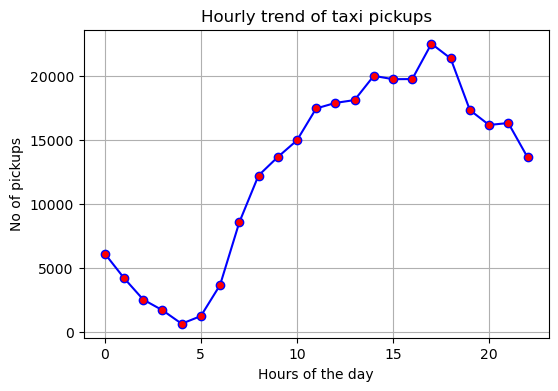

In [177]:
# Find and show the hourly trends in taxi pickups

hourly_trends = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize =(6,4))
plt.plot(hourly_trends.index,hourly_trends.values,marker ='o',linestyle ='-',color='b',markerfacecolor='r')
plt.xlabel('Hours of the day')
plt.ylabel('No of pickups')
plt.title('Hourly trend of taxi pickups')
plt.grid(True)
plt.show()

We can observe a significant decrease in taxi pickups between **12 AM (0 hours) and 5 AM**,
dropping from **10,000 to just 1,000**. However, from **5 AM to 3 PM (15 hours)**,
the trend shows substantial growth, surpassing **30,000 pickups**.
The pickup rate then stabilizes for a few hours before reaching its **peak between 3 PM and 8 PM (15 to 20 hours)**.
Finally, after **8 PM**, the trend starts to decline rapidly, with a noticeable drop in pickups as the night progresses.

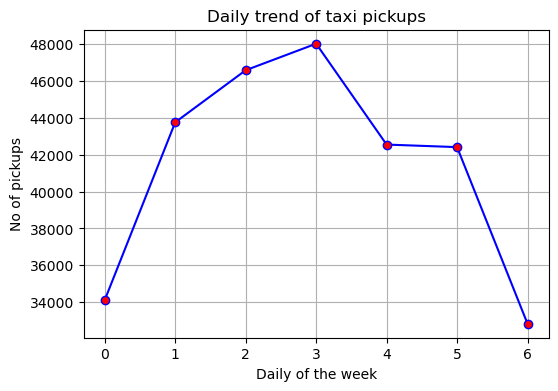

In [179]:
# Find and show the daily trends in taxi pickups (days of the week)

weekday_no =df['tpep_pickup_datetime'].dt.dayofweek
daily_trend = weekday_no.value_counts().sort_index()
plt.figure(figsize =(6,4))
plt.plot(daily_trend.index,daily_trend.values,marker ='o',linestyle ='-',color='b',markerfacecolor='r')
plt.xlabel('Daily of the week')
plt.ylabel('No of pickups')
plt.title('Daily trend of taxi pickups')
plt.grid(True)
plt.show()

When comparing the trend on an hourly basis, we observe distinct patterns throughout the week.
During the **first three days**, the trend shows a significant increase in taxi pickups.
However, after this peak, the trend begins to **decline steadily** until the **sixth day of the week**.
Finally, the number of pickups **drops sharply** towards the end of the week.
This clearly indicates that taxi demand is **highest at the beginning of the week**, with a noticeable decline as the week progresses.

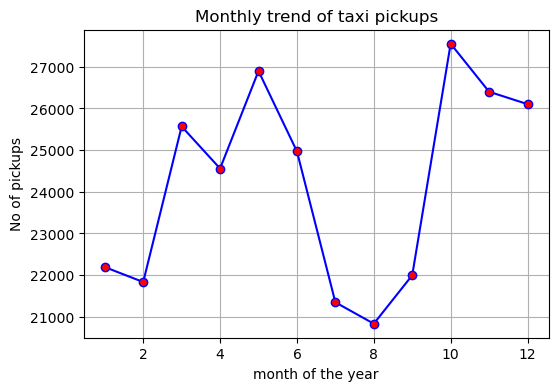

In [183]:
# Show the monthly trends in pickups

month_no =df['tpep_pickup_datetime'].dt.month
monthly_trend = month_no.value_counts().sort_index()
plt.figure(figsize =(6,4))
plt.plot(monthly_trend.index,monthly_trend.values,marker ='o',linestyle ='-',color='b',markerfacecolor='r')
plt.xlabel('month of the year')
plt.ylabel('No of pickups')
plt.title('Monthly trend of taxi pickups')
plt.grid(True)
plt.show()



 The monthly trend of taxi pickups shows fluctuations throughout the year. There is an increase in demand around the 4th and 6th months, peaking at around the 6th month. However, there is a decline afterward, reaching the lowest point around the 8th month. Following this dip, there is a sharp rise, peaking again around the 10th month, before slightly decreasing toward the end of the year. This pattern suggests seasonal variations in taxi demand, with notable peaks in the middle and later months of the year.  



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [188]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']
for i in financial_columns:
    zero_or_negative = df.loc[df[i]<=0,i].value_counts()
    print(f'{i} : {zero_or_negative.values}')


fare_amount : [33]
tip_amount : [63379]
total_amount : []
trip_distance : [1548]


In [190]:
df.shape

(290256, 25)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

I hope exclude **tip_amount** we can drop Zero values from data to copy.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [195]:
# Create a df with non zero entries for the selected parameters.
df= df[~(df['fare_amount']<=0)]
df= df[~(df['total_amount']<=0)]
df= df[~(df['trip_distance']<=0)]

In [197]:
df.shape

(288676, 25)

In [199]:
df.drop('hour',axis=1,inplace=True)

In [201]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration'],
      dtype='object')

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [204]:
df['month']=df['tpep_pickup_datetime'].dt.month

In [206]:
monthly_trend

tpep_pickup_datetime
1     22194
2     21835
3     25567
4     24558
5     26897
6     24969
7     21349
8     20835
9     21997
10    27552
11    26400
12    26103
Name: count, dtype: int64

In [208]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
16         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
20         1  2023-01-01 00:58:43   2023-01-01 01:06:07              2.0   
21         2  2023-01-01 00:52:35   2023-01-01 01:14:24              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
6            1.59         1.0                  N            79           164   
16           0.74         1.0                  N           229           141   
17           1.73         1.0                  N           144           113   
20           1.70         1.0                  N           107           229   
21           1.83         1.0                  N           164           246   

    payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
6              1  ...           0.0                    1.0         19.68   
16             1  ...           0.0                    1.0         10.80   
17             1  ...           0.0                    1.0         19.15   
20             1  ...           0.0                    1.0         15.30   
21             1  ...           0.0                    1.0         26.10   

    congestion_surcharge  month        date  Airport_fee  pickup_hour  \
6                    2.5      1  2023-01-01          0.0            0   
16                   2.5      1  2023-01-01          0.0            0   
17                   2.5      1  2023-01-01          0.0            0   
20                   2.5      1  2023-01-01          0.0            0   
21                   2.5      1  2023-01-01          0.0            0   

    drop_hour trip_duration  
6           1             1  
16          1             1  
17          1             1  
20          1             1  
21          1             1  

[5 rows x 24 columns]

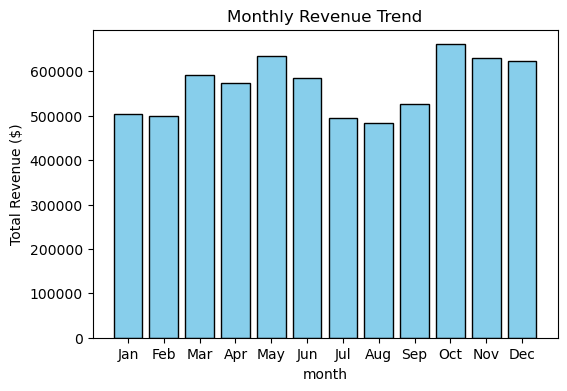

In [210]:
# Group data by month and analyse monthly revenue

month_no =df['tpep_pickup_datetime'].dt.month
monthly_trend = df.groupby('month')['total_amount'].sum()
plt.figure(figsize =(6,4))
plt.bar(monthly_trend.index,monthly_trend.values,color='skyblue',edgecolor='black')
plt.xlabel('month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


The Monthly Revenue Trend chart shows variations in total revenue across different months. Revenue remains relatively stable in the first few months but sees a notable increase in April and May, peaking around May. However, there is a decline in revenue during the summer months, reaching the lowest levels in July and August. Following this dip, revenue starts increasing again in September and sees a sharp peak in October, marking the highest revenue of the year. The trend slightly declines in November and December but remains relatively high compared to the mid-year months.

This pattern suggests seasonal fluctuations, with higher revenue in the spring and fall, and a noticeable dip during the summer months.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [214]:
df['quarter']=df['tpep_pickup_datetime'].dt.quarter

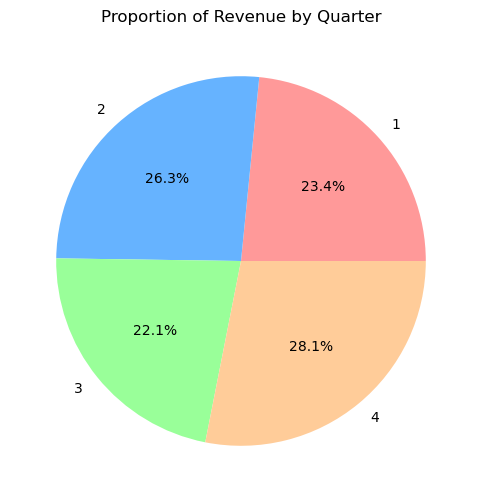

In [216]:
# Calculate proportion of each quarter
quarter_revenue =df.groupby('quarter')['total_amount'].sum()
quarter_proportion=quarter_revenue/quarter_revenue.sum()
plt.figure(figsize =(6,6))
plt.pie(quarter_proportion,labels = quarter_proportion.index, autopct='%1.1f%%',colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Proportion of Revenue by Quarter")
plt.show()

The Proportion of Revenue by Quarter pie chart illustrates the distribution of revenue across the four quarters of the year.

Q4 (Oct-Dec) accounts for the highest proportion of revenue at 28.1%, indicating a strong financial performance toward the end of the year.
Q2 (Apr-Jun) follows with 26.3%, suggesting that spring is another peak period for revenue.
Q1 (Jan-Mar) contributes 23.4%, showing relatively steady performance at the start of the year.
Q3 (Jul-Sep) has the lowest share at 22.1%, reflecting a dip in revenue during the summer months.
This trend suggests that revenue is highest in the last quarter, likely due to increased demand, holiday seasons, or business cycles. In contrast, the third quarter sees the lowest share, possibly due to lower activity during the summer period.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

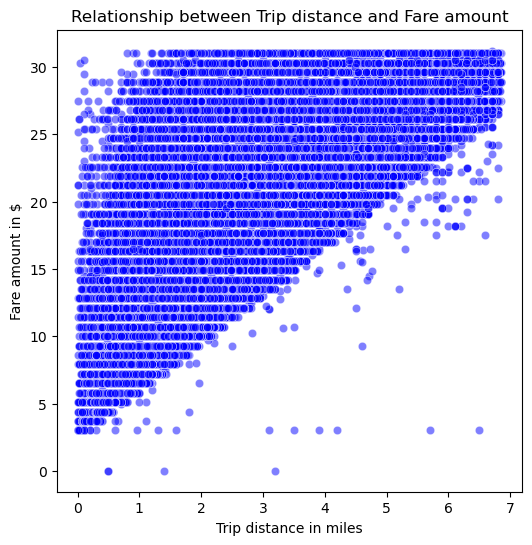

Correlation between Trip Distance and Fare Amount: 0.82


In [220]:
# Show how trip fare is affected by distance
trip_morethan_zero=df[df['trip_distance']>0]
plt.figure(figsize=(6,6))
sns.scatterplot(x=trip_morethan_zero['trip_distance'],y=trip_morethan_zero['fare_amount'],alpha=0.5,color='blue')
plt.xlabel('Trip distance in miles')
plt.ylabel('Fare amount in $')
plt.title('Relationship between Trip distance and Fare amount')
plt.show()
correlation = trip_morethan_zero['trip_distance'].corr(trip_morethan_zero['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation:.2f}')

There is a positive correlation between trip distance and fare amount, meaning longer trips generally result in higher fares.
Most trips are clustered between 0 to 3 miles, with fares typically ranging between $5 and $30.
A significant number of trips have a fare cap around $30, suggesting a potential maximum fare limit or frequent fixed-rate rides.
Some outliers exist where short distances have unusually high fares, or longer distances have relatively low fares, possibly due to additional charges, discounts, or fare adjustments.
This pattern aligns with the expectation that taxi fares increase with distance, but other factors like surcharges, traffic conditions, and pricing structures may also influence the fare.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

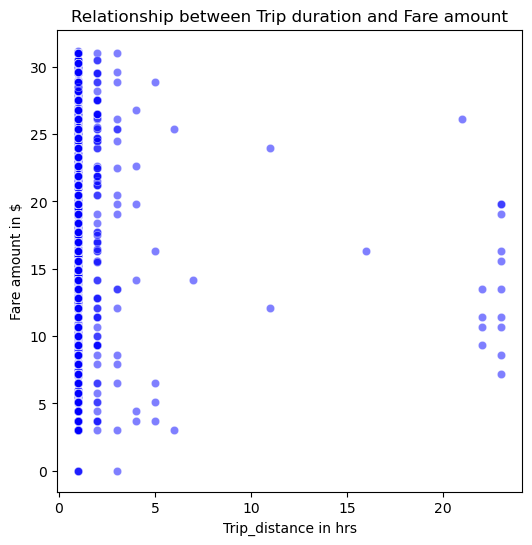

Correlation between Trip duration and Fare Amount: -0.00


In [224]:
# Show relationship between fare and trip duration
plt.figure(figsize=(6,6))
sns.scatterplot(x=df['trip_duration'],y=df['fare_amount'],alpha=0.5,color='blue')
plt.xlabel('Trip_distance in hrs')
plt.ylabel('Fare amount in $')
plt.title('Relationship between Trip duration and Fare amount')
plt.show()
correlation = df['trip_duration'].corr(trip_morethan_zero['fare_amount'])
print(f'Correlation between Trip duration and Fare Amount: {correlation:.2f}')


The majority of trips have a duration of less than 1 hour, indicating that most rides are short-distance trips.
For these short trips, fares are typically clustered between $5 and $30.
There are some outliers where trips have very long durations (e.g., over 10 or even 20 hours) but do not always correspond to higher fares. This could indicate trip anomalies, incorrect data, or cases where passengers were charged a fixed amount despite long wait times.
Unlike the previous distance vs. fare plot, this scatter plot does not show a clear linear correlation, likely because fares are influenced by both time and distance, along with additional factors such as waiting time, traffic conditions, or fare structures.
This suggests that while distance plays a major role in fare pricing, time alone is not always a reliable predictor of fare amount due to the variability in pricing mechanisms.

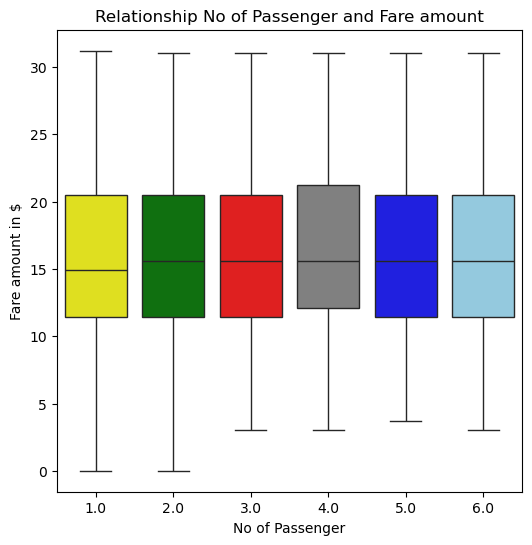

Correlation between Passenger and Fare Amount: 0.02


In [227]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x=df['passenger_count'],y=df['fare_amount'],hue=None,palette=['yellow', 'green', 'red', 'gray', 'blue', 'skyblue'])
plt.xlabel('No of Passenger')
plt.ylabel('Fare amount in $')
plt.title('Relationship No of Passenger and Fare amount')
plt.show()
correlation = df['passenger_count'].corr(trip_morethan_zero['fare_amount'])
print(f'Correlation between Passenger and Fare Amount: {correlation:.2f}')


The fare amount does not strongly depend on the number of passengers.
The fare distribution is consistent regardless of whether 1 or 6 passengers are present.
Outliers might need further investigation to determine if they are legitimate high fares or data anomalies.

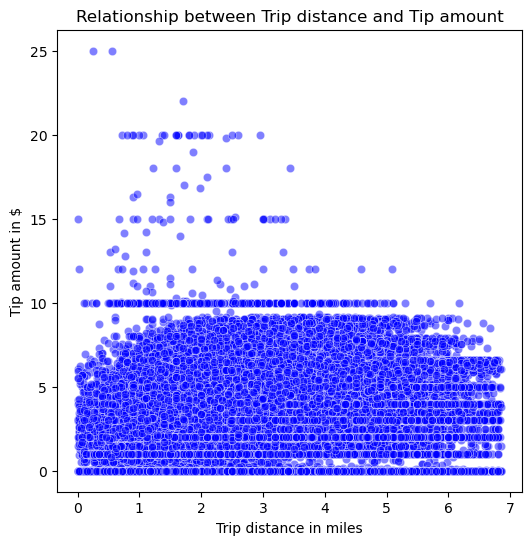

Correlation between Trip Distance and Tip Amount: 0.25


In [230]:
# Show relationship between tip and trip distance
trip_morethan_zero=df[df['trip_distance']>0]
plt.figure(figsize=(6,6))
sns.scatterplot(x=trip_morethan_zero['trip_distance'],y=trip_morethan_zero['tip_amount'],alpha=0.5,color='blue')
plt.xlabel('Trip distance in miles')
plt.ylabel('Tip amount in $')
plt.title('Relationship between Trip distance and Tip amount')
plt.show()
correlation = trip_morethan_zero['trip_distance'].corr(trip_morethan_zero['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation:.2f}')


Short trips dominate the dataset, with low to moderate tips being common.
No direct correlation between trip distance and tip amount.
Some passengers tip exceptionally high, but it's not frequent.
Predefined tipping amounts (like $10) might be influencing the data.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

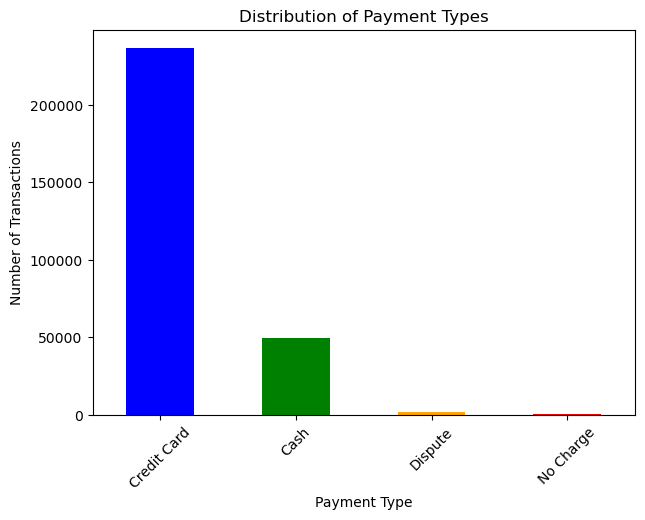

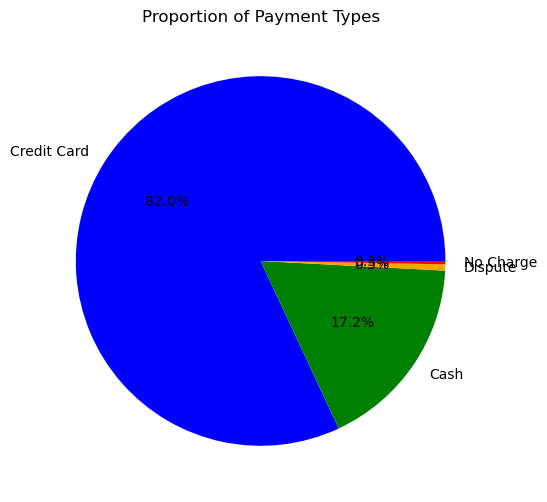

In [234]:
# Analyse the distribution of different payment types (payment_type).


payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown"
}
payment_count=df['payment_type'].value_counts()
payment_count.index=payment_count.index.map(payment_labels)

plt.figure(figsize=(7, 5))
payment_count.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(6, 6))
payment_count.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel("")  
plt.title("Proportion of Payment Types")
plt.show()

Credit Card is the dominant payment method, significantly higher than other modes.
Cash payments are much lower in comparison, suggesting a preference for digital transactions.
Dispute and No Charge transactions are rare, indicating a low occurrence of payment issues.
This trend suggests a tech-savvy customer base, likely using app-based ride-hailing services.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [241]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [244]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Arun\OneDrive/Desktop/upgrad 2025 new/EDA/EDA Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


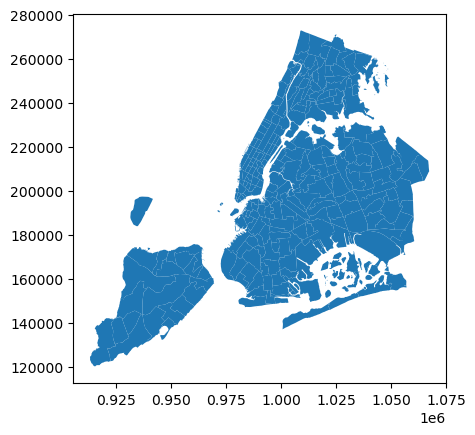

In [247]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [251]:
# Merge zones and trip records using locationID and PULocationID

df=df.merge(zones,left_on='PULocationID',right_on='LocationID',how='left')
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
1         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
2         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
3         1  2023-01-01 00:58:43   2023-01-01 01:06:07              2.0   
4         2  2023-01-01 00:52:35   2023-01-01 01:14:24              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.59         1.0                  N            79           164   
1           0.74         1.0                  N           229           141   
2           1.73         1.0                  N           144           113   
3           1.70         1.0                  N           107           229   
4           1.83         1.0                  N           164           246   

   payment_type  ...  drop_hour  trip_duration  quarter  OBJECTID  Shape_Leng  \
0             1  ...          1              1        1      79.0    0.042625   
1             1  ...          1              1        1     229.0    0.042525   
2             1  ...          1              1        1     144.0    0.027620   
3             1  ...          1              1        1     107.0    0.038041   
4             1  ...          1              1        1     164.0    0.035772   

   Shape_Area                           zone  LocationID    borough  \
0    0.000108                   East Village        79.0  Manhattan   
1    0.000095  Sutton Place/Turtle Bay North       229.0  Manhattan   
2    0.000047            Little Italy/NoLiTa       144.0  Manhattan   
3    0.000075                       Gramercy       107.0  Manhattan   
4    0.000056                  Midtown South       164.0  Manhattan   

                                            geometry  
0  POLYGON ((988746.067 202151.955, 988733.885 20...  
1  POLYGON ((994880.664 214401.395, 994724.359 21...  
2  POLYGON ((985411.76 200369.518, 985342.573 200...  
3  POLYGON ((989131.643 205749.904, 989084.531 20...  
4  POLYGON ((988787.425 210315.593, 988662.868 21...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [254]:
# Group data by location and calculate the number of trips

trip_per_location =df.groupby('LocationID').size().reset_index(name ='total_pickups_trips')

In [256]:
trip_per_location

LocationID  total_pickups_trips
0           1.0                    1
1           3.0                    4
2           4.0                  297
3           7.0                  117
4           9.0                    6
..          ...                  ...
220       259.0                    4
221       260.0                   37
222       261.0                 1760
223       262.0                 3662
224       263.0                 4892

[225 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [259]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_per_location,on ='LocationID',how ='left')



In [261]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'total_pickups_trips'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

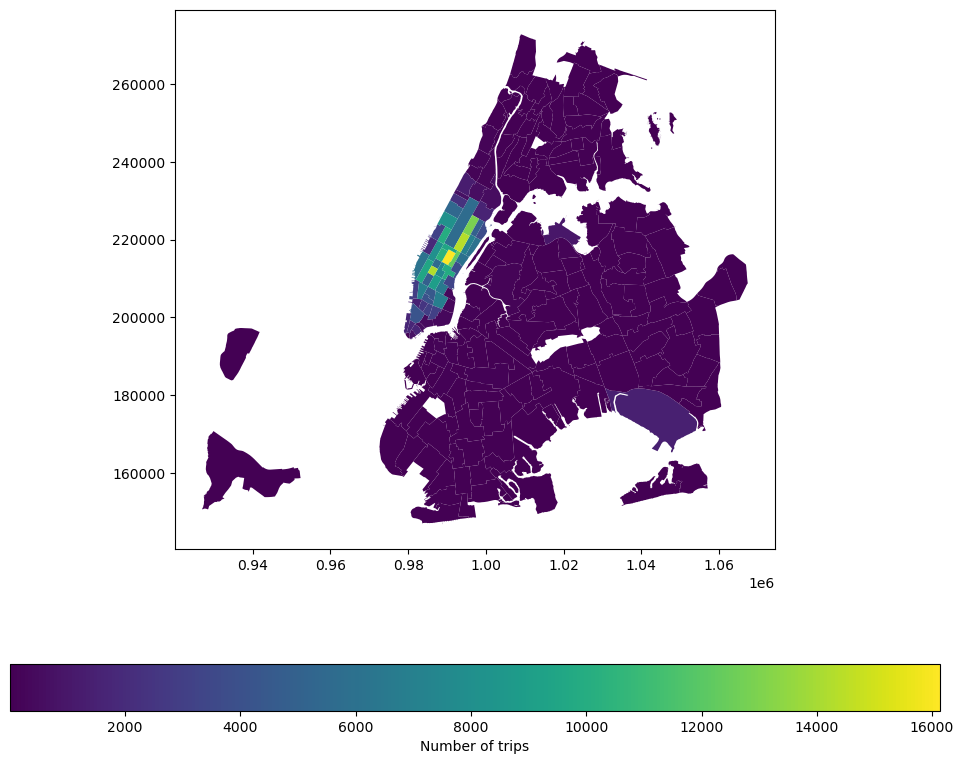

In [266]:
# Define figure and axis
fig,ax = plt.subplots(1,1,figsize=(12,10))

# Plot the map and display it

zones.plot(
    column = 'total_pickups_trips',
ax = ax,
legend = True,
legend_kwds = {'label': "Number of trips", 'orientation': "horizontal"}
)
plt.show()

The highest concentration of trips occurs in Manhattan, particularly in midtown and lower Manhattan, shown by the yellow and green regions.
Other boroughs, such as Brooklyn, Queens, and the Bronx, have lower trip densities, indicated by darker shades.
This pattern suggests high demand for taxis in commercial and tourist areas, likely due to business activity, tourism, and nightlife.
The airport and transit hubs (e.g., JFK, LaGuardia) might also show moderate activity.

In [268]:
# can you try displaying the zones DF sorted by the number of trips?
zones = zones.sort_values(by='total_pickups_trips',ascending = False)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                          zone  \
160       161    0.035804    0.000072                Midtown Center   
236       237    0.042213    0.000096         Upper East Side South   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   

     LocationID    borough                                           geometry  \
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     total_pickups_trips  
160              16137.0  
236              14333.0  
185              14260.0  
235              12887.0  
161              12237.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [279]:
df.rename(columns={'zone':'pickup_zone'},inplace=True)

In [281]:
df=df.merge(zones,left_on='DOLocationID',right_on='LocationID',how='left')

In [282]:
df.rename(columns={'zone':'drop_zone'},inplace=True)

In [285]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration', 'quarter', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'pickup_zone', 'LocationID_x',
       'borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',
       'drop_zone', 'LocationID_y', 'borough_y', 'geometry_y',
       'total_pickups_trips'],
      dtype='object')

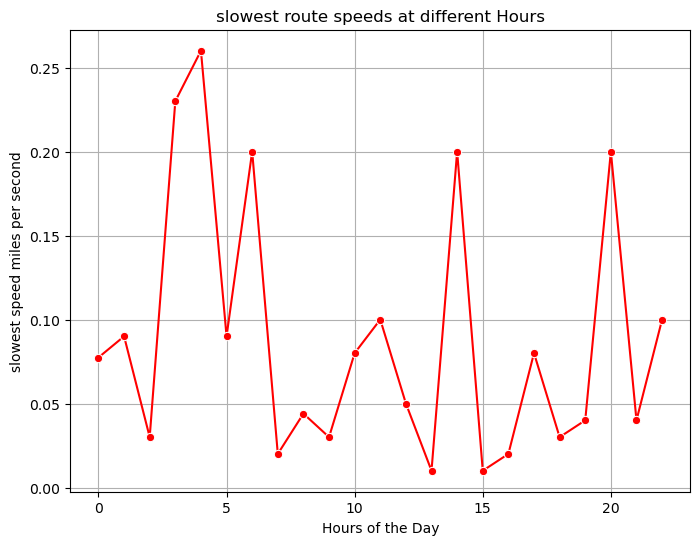

In [287]:
# Find routes which have the slowest speeds at different times of the day
route_status = df.groupby(['pickup_zone','drop_zone','pickup_hour']).agg(
    average_duration = ('trip_duration','mean'),
    average_distance = ('trip_distance','mean')).reset_index()
route_status['speed']=route_status['average_distance']/route_status['average_duration']
slowest_route=route_status.loc[route_status.groupby('pickup_hour')['speed'].idxmin()]
plt.figure(figsize=(8,6))
sns.lineplot(data=slowest_route,x='pickup_hour',y='speed',marker ='o',color='red')
plt.xlabel('Hours of the Day')
plt.ylabel('slowest speed miles per second')
plt.title('slowest route speeds at different Hours')
plt.grid(True)
plt.show()


**Fluctuating Speeds** - The speed fluctuating at different hours,which noticeable peaks and dips.<br>
**Lowest slow speeds** - Around hours 6, 15, and 16, the slowest speeds are close to zero, indicating heavy congestion or extremely long trip durations.<br>
**Sharp Peaks and Drops** – Some hours (e.g., 4 AM and 20 PM) show sudden spikes in speed, possibly due to reduced congestion in off-peak hours.<br>
**Rush Hour Congestion** - The sharp drops in speed may align with morning (7-9 AM) and evening (5-7 PM) rush hours.<br>
**Late Night & Early Morning Efficiency** - The peaks around 4-5 AM and 21 PM indicate better travel speeds due to reduced traffic.<br>


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

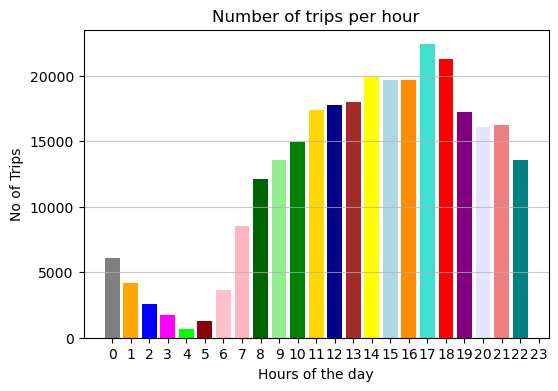

Business hour: 17:00 with 22410 trips


In [292]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = df.groupby('pickup_hour')['pickup_hour'].value_counts().sort_index()
busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()
colors = {
    "blue", "red", "green", "purple", "orange", "cyan", "magenta", "yellow", 
    "brown", "pink", "lime", "teal", "lavender", "turquoise", "gold", "darkblue",
    "darkred", "darkgreen", "darkorange", "lightblue", "lightcoral", "lightgreen", 
    "lightpink", "gray"
}
plt.figure(figsize=(6,4))
plt.bar(trips_per_hour.index,trips_per_hour.values,color=colors)
plt.title('Number of trips per hour')
plt.xlabel('Hours of the day')
plt.ylabel('No of Trips')
plt.xticks(range(24))
plt.grid(axis='y', linestyle = '-', alpha= 0.7)
plt.show()
print(f'Business hour: {busiest_hour}:00 with {max_trips} trips')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

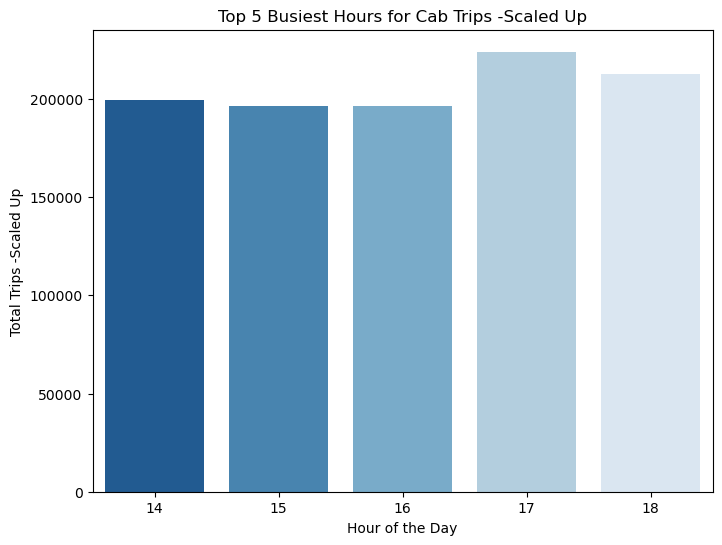

In [296]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1
hour_wise_trip =df.groupby('pickup_hour').agg(trips=('pickup_hour','count')).reset_index()
hour_wise_trip.columns= ['hour','trip_count']
busiest_hours = hour_wise_trip.nlargest(5,'trip_count')
busiest_hours["scaled_trip_count"] = busiest_hours["trip_count"] / sample_fraction
plt.figure(figsize=(8,6))
sns.barplot(data=busiest_hours,x='hour',y='scaled_trip_count',palette='Blues_r')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Trips -Scaled Up")
plt.title("Top 5 Busiest Hours for Cab Trips -Scaled Up")
plt.show()

**Busiest hours** -  14:00 - 18:00 This confirms that the peak demand happens in the afternoon and early evening.<br>
**contribution** - The trip counts for these hours are quite similar, meaning no single hour dominates the peak period.<br>


In [299]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration', 'quarter', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'pickup_zone', 'LocationID_x',
       'borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',
       'drop_zone', 'LocationID_y', 'borough_y', 'geometry_y',
       'total_pickups_trips'],
      dtype='object')

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

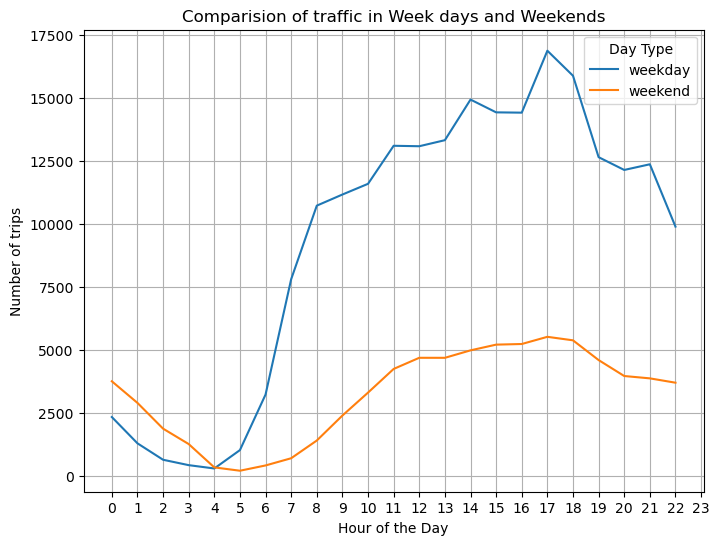

In [302]:
# Compare traffic trends for the week days and weekends
df['day_of_week']=df['tpep_pickup_datetime'].dt.weekday
df['day_type'] = df['day_of_week'].apply(lambda x: 'weekday' if x<5 else 'weekend')
hourly_traffic = df.groupby(['day_type','pickup_hour']).size().reset_index(name = 'trip_count')
plt.figure(figsize=(8,6))
sns.lineplot(data=hourly_traffic,x='pickup_hour',y='trip_count',hue='day_type',markers='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of trips')
plt.title('Comparision of traffic in Week days and Weekends')
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.grid(True)
plt.show()


**Weekday Traffic:**

Morning Peak (7 AM - 10 AM): Sharp rise in trips, likely due to work commutes.<br>
Evening Peak (4 PM - 7 PM): Another high, indicating post-work travel.<br>
Higher overall traffic compared to weekends, especially during working hours.<br>

**Weekend Traffic** 

More gradual increase starting from 7 AM.<br>
Peak between 11 AM - 6 PM, likely due to leisure trips.<br>
No sharp rush-hour spikes, showing a more relaxed travel pattern.<br>

Weekdays have clear rush-hour peaks, dominated by work commutes.<br>
Weekends show a steady rise and fall, indicating leisure-based travel.

In [305]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration', 'quarter', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'pickup_zone', 'LocationID_x',
       'borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',
       'drop_zone', 'LocationID_y', 'borough_y', 'geometry_y',
       'total_pickups_trips', 'day_of_week', 'day_type'],
      dtype='object')

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

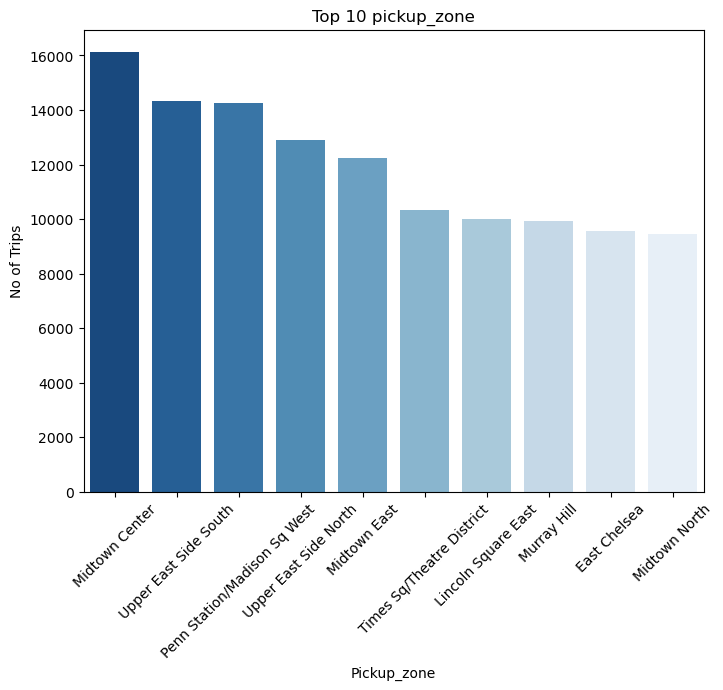

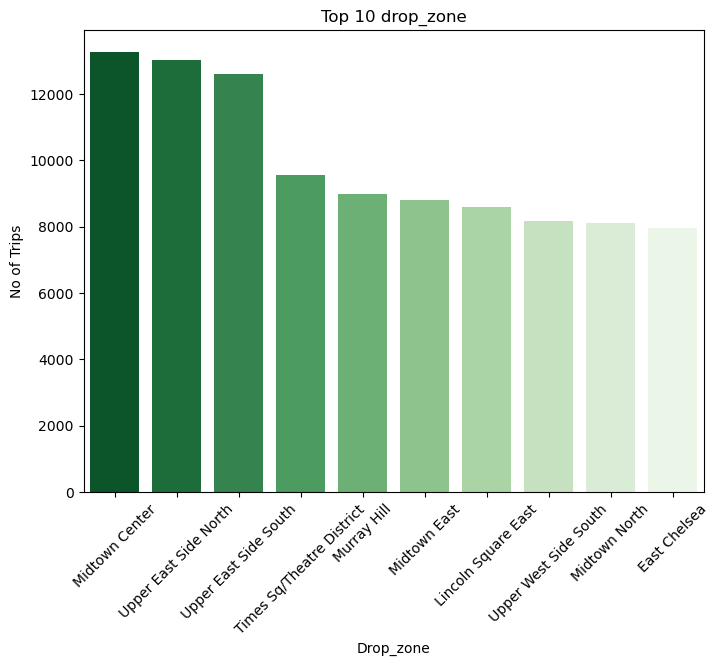

In [308]:
# Find top 10 pickup and dropoff zones
zone_wise_trip =df.groupby('pickup_zone').agg(trips=('pickup_zone','count')).reset_index()
zone_wise_trip.columns= ['pickup_zone','trip_count']
top10_pickup_zone = zone_wise_trip.nlargest(10,'trip_count')
plt.figure(figsize=(8,6))
sns.barplot(data=top10_pickup_zone,x='pickup_zone',y='trip_count',palette='Blues_r')
plt.xlabel("Pickup_zone")
plt.ylabel("No of Trips")
plt.title("Top 10 pickup_zone")
plt.xticks(rotation = 45)
plt.show()

zone_wise_trip_d =df.groupby('drop_zone').agg(trips=('drop_zone','count')).reset_index()
zone_wise_trip_d.columns= ['drop_zone','trip_count']
top10_drop_zone = zone_wise_trip_d.nlargest(10,'trip_count')
plt.figure(figsize=(8,6))
sns.barplot(data=top10_drop_zone,x='drop_zone',y='trip_count',palette='Greens_r')
plt.xlabel("Drop_zone")
plt.ylabel("No of Trips")
plt.title("Top 10 drop_zone")
plt.xticks(rotation = 45)
plt.show()


**Pickup Zones:** The most popular pickup zone is Midtown Center, followed by Upper East Side South and Penn Station/Madison Sq West. <br>
These areas are likely transportation and business hubs.<br>
**Dropoff Zones:** The most frequent dropoff zone is also Midtown Center, followed by Upper East Side North and Upper East Side South. <br>
This suggests that many trips either originate from or Midtown Center and Upper East Side South.

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [312]:
pickup_drop_zone =pd.DataFrame({'zone': zones['zone'].unique()})
pickup_drop_zone.shape

(260, 1)

In [316]:
pickup_drop_zone.columns

Index(['zone'], dtype='object')

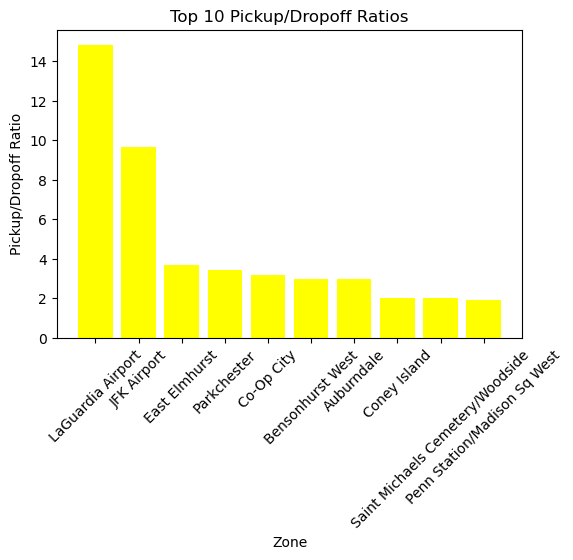

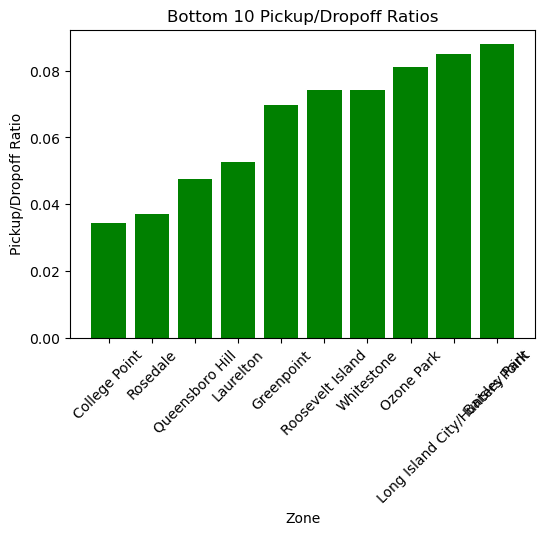

In [322]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df_pickup = df.groupby('pickup_zone').agg(pickup_count=('pickup_zone','count')).reset_index()

df_drop = df.groupby('drop_zone').agg(drop_count=('drop_zone','count')).reset_index()

pickup_drop_zone= pickup_drop_zone.merge(df_pickup,left_on='zone',right_on='pickup_zone',how='left')

pickup_drop_zone= pickup_drop_zone.merge(df_drop,left_on='zone',right_on='drop_zone',how='left')

pickup_drop_zone['pickup_drop_ratio']=pickup_drop_zone['pickup_count']/pickup_drop_zone['drop_count']

top_10 = pickup_drop_zone.nlargest(10, "pickup_drop_ratio")

bottom_10 = pickup_drop_zone.nsmallest(10, "pickup_drop_ratio")
# top 10 pickup/drop ratio
plt.figure(figsize=(6,4))
plt.bar(top_10["zone"], top_10["pickup_drop_ratio"], color="yellow")
plt.xlabel("Zone")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()
# top 10 pickup/drop ratio
plt.figure(figsize=(6,4))
plt.bar(bottom_10["zone"], bottom_10["pickup_drop_ratio"], color="green")
plt.xlabel("Zone")
plt.ylabel("Pickup/Dropoff Ratio")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.xticks(rotation=45)
plt.show()

**Top 10 Zones:**
LaGuardia Airport and JFK Airport have the highest pickup/dropoff ratios, indicating significantly more pickups than drop-offs.<br>
Other high-ratio zones include East Elmhurst, Parkchester, and Co-Op City,<br>
suggesting they are more commonly used as departure points rather than destinations.<br>
<br>
**Bottom 10 Zones:** <br>
Zones like College Point, Rosedale, and Queensboro Hill have the lowest pickup/dropoff ratios,<br>
meaning these areas receive more drop-offs than pickups.<br>
The lower ratios could also indicate areas with limited transportation options for return trips.

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

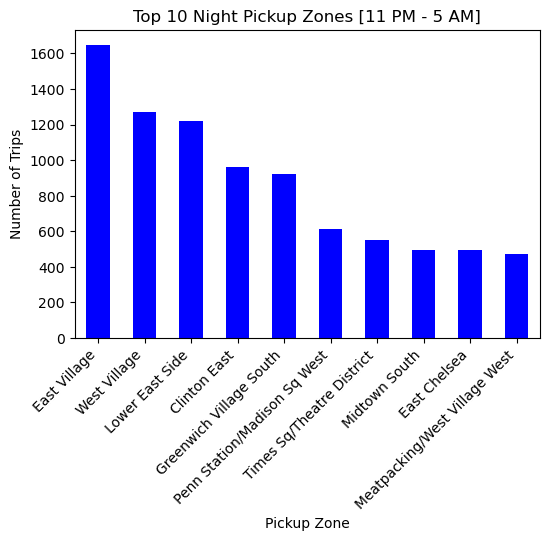

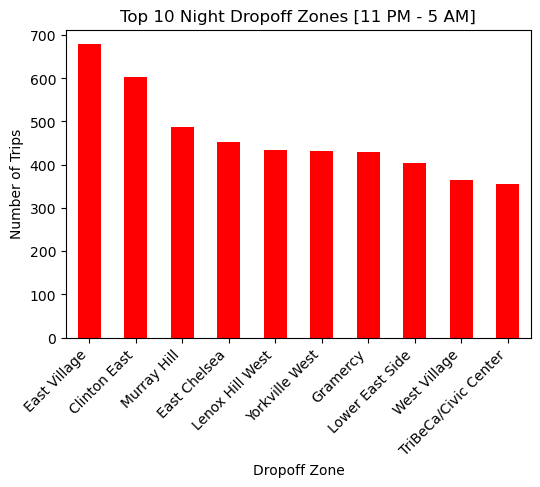

In [341]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours=df[(df['pickup_hour']>=23)|(df['pickup_hour']<=5)]
top_night_pickup_zones = night_hours.groupby('pickup_zone').size().sort_values(ascending=False).head(10)

top_night_dropoff_zones = night_hours.groupby('drop_zone').size().sort_values(ascending=False).head(10)

# Plot for pickup Zones
plt.figure(figsize=(6, 4))
top_night_pickup_zones.plot(kind='bar', color='blue')
plt.title("Top 10 Night Pickup Zones [11 PM - 5 AM]")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot for Drop Zones
plt.figure(figsize=(6, 4))
top_night_dropoff_zones.plot(kind='bar', color='red')
plt.title("Top 10 Night Dropoff Zones [11 PM - 5 AM]")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45, ha='right')
plt.show()


The pickup zones have significantly higher trip counts, with the top zone (East Village) exceeding 1600 pickups, <br>
while the highest drop-off count is just around 700. <br>
This suggests a higher number of people starting their trips rather than ending them in these areas.<br>
Dropoff locations are more spread out across different zones compared to pickups, which are concentrated in nightlife-heavy areas such as East Village,<br>
West Village, and Lower East Side.

In [335]:
night_trip.head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, date, Airport_fee, pickup_hour, drop_hour, trip_duration, quarter, OBJECTID_x, Shape_Leng_x, Shape_Area_x, pickup_zone, LocationID_x, borough_x, geometry_x, OBJECTID_y, Shape_Leng_y, Shape_Area_y, drop_zone, LocationID_y, borough_y, geometry_y, total_pickups_trips, day_of_week, day_type]
Index: []

[0 rows x 42 columns]

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [357]:
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
df['fare_per_mile']=df['fare_amount']/df['trip_distance']
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

In [359]:
# Filter for night hours (11 PM to 5 AM)

night_hours=df[(df['pickup_hour']>=23)|(df['pickup_hour']<=5)]

##### Pricing Strategy

In [362]:
night_hours.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration', 'quarter', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'pickup_zone', 'LocationID_x',
       'borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',
       'drop_zone', 'LocationID_y', 'borough_y', 'geometry_y',
       'total_pickups_trips', 'day_of_week', 'day_type', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

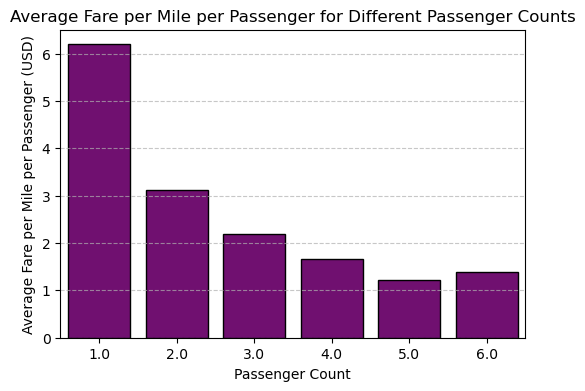

In [382]:
# Analyse the fare per mile per passenger for different passenger counts

Average_fare_per_mile_per_passenger = night_hours.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=Average_fare_per_mile_per_passenger,x=Average_fare_per_mile_per_passenger['passenger_count'],
            y=Average_fare_per_mile_per_passenger['fare_per_mile_per_passenger'],color='purple',edgecolor='black')
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger (USD)")
plt.title("Average Fare per Mile per Passenger for Different Passenger Counts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The fare per mile per passenger decreases as the number of passengers increases. <br>
This suggests that the cost is shared among multiple passengers, making individual fares cheaper.<br>
A single passenger pays the highest fare per mile, exceeding $6, indicating that riding alone is significantly more expensive.<br>
A small rise in cost at 6 passengers could indicate a surcharge or different fare structure for larger groups.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

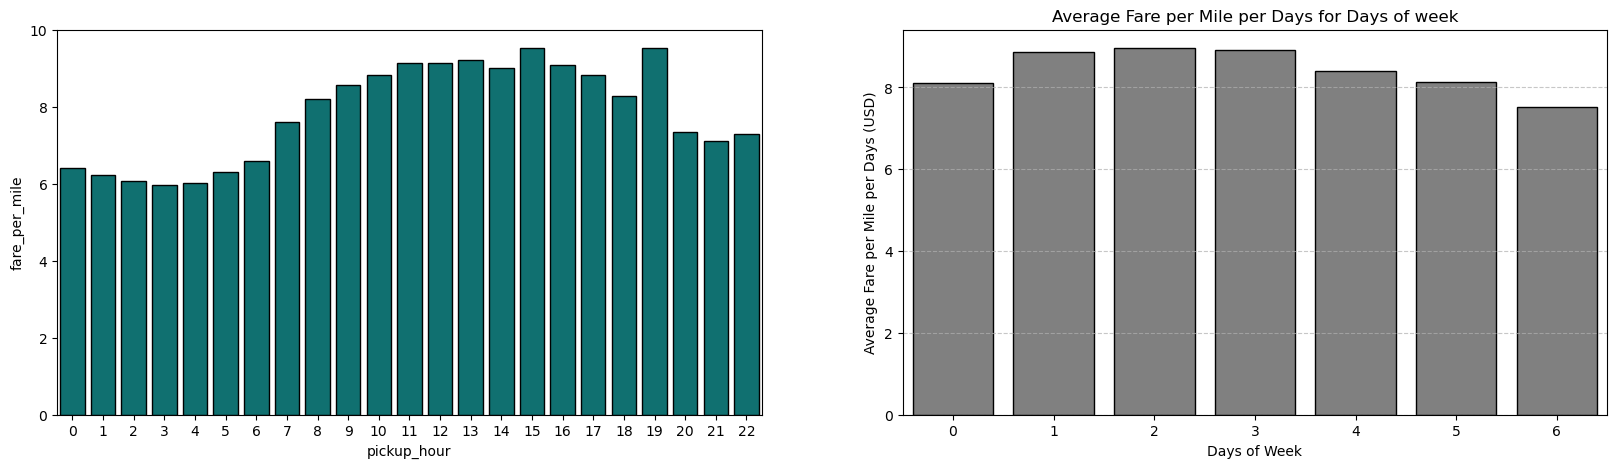

In [464]:
# Compare the average fare per mile for different days and for different times of the day
Average_fare_per_mile_per_hours_of_day= df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
Average_fare_per_mile_per_day_of_week = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.barplot(data=Average_fare_per_mile_per_hours_of_day,x=Average_fare_per_mile_per_hours_of_day['pickup_hour'],
            y=Average_fare_per_mile_per_hours_of_day['fare_per_mile'],color='teal',edgecolor='black',ax=ax[0])
plt.xlabel("Hours of Day")
plt.ylabel("Average Fare per Mile per hour (USD)")
plt.title("Average Fare per Mile per hour for Hours of Day")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(data=Average_fare_per_mile_per_day_of_week,x=Average_fare_per_mile_per_day_of_week['day_of_week'],
            y=Average_fare_per_mile_per_day_of_week['fare_per_mile'],color='gray',edgecolor='black',ax=ax[1])
plt.xlabel("Days of Week")
plt.ylabel("Average Fare per Mile per Days (USD)")
plt.title("Average Fare per Mile per Days for Days of week")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Hourly Fare per Mile Trend:** The fare per mile fluctuates throughout the day,<br>
with a noticeable peak between 10 AM - 4 PM and another spike around 7 PM. Early morning and late-night fares tend to be lower.<br>
**Daily Fare per Mile Trend:** The fare per mile remains relatively stable across the weekdays but is slightly lower on weekends,<br>
particularly on Sundays.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

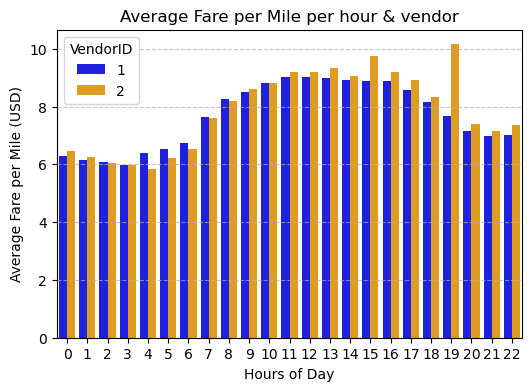

In [429]:
# Compare fare per mile for different vendors
fare_per_mile_Vendor =  df.groupby(['VendorID','pickup_hour'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=fare_per_mile_Vendor,x=fare_per_mile_Vendor['pickup_hour'],y=fare_per_mile_Vendor['fare_per_mile'],
            hue=fare_per_mile_Vendor['VendorID'],palette =['blue','orange'])
plt.xlabel("Hours of Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile per hour & vendor")
plt.xticks(rotation=0)
plt.legend(title='VendorID')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The fare per mile fluctuates throughout the day,
with a noticeable peak between 10 AM - 4 PM and another spike around 7 PM. Early morning and late-night fares tend to be lower.
Vendor 1 has slightly higher fares in the first half of the day, while Vendor 2 takes a slight lead in the second half.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


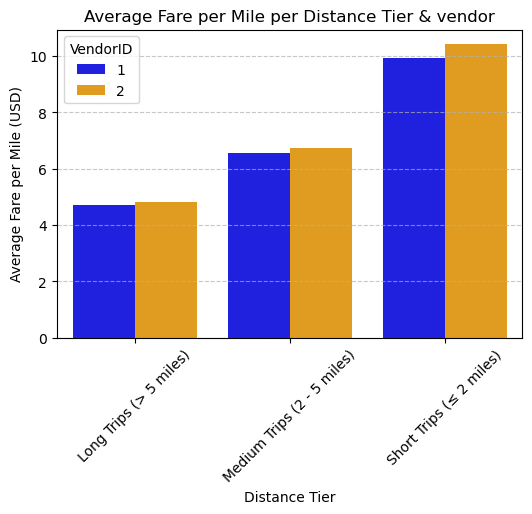

In [447]:
# Defining distance tiers

def distance_tiers(distance):
    if distance <= 2:
        return 'Short Trips (≤ 2 miles)'
    elif 2 < distance <= 5:
        return 'Medium Trips (2 - 5 miles)'
    else:
        return 'Long Trips (> 5 miles)'

df['distance_tiers'] = df['trip_distance'].apply(distance_tiers)
Average_fare_per_distance_tiers= df.groupby(['VendorID','distance_tiers'])['fare_per_mile'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=Average_fare_per_distance_tiers,x=Average_fare_per_distance_tiers['distance_tiers'],y=Average_fare_per_distance_tiers['fare_per_mile'],
            hue=Average_fare_per_distance_tiers['VendorID'],palette =['blue','orange'])
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile per Distance Tier & vendor")
plt.xticks(rotation=45)
plt.legend(title='VendorID')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
    


Short trips (≤ 2 miles) have the highest fare per mile, followed by medium trips (2 - 5 miles),<br>
and long trips (> 5 miles) have the lowest fare per mile.<br>
This is expected since base fare and initial charges have a greater impact on shorter trips.<br>
<br>
For short trips, Vendor 2 charges a slightly higher fare per mile than Vendor 1.<br>
For medium and long trips, the fare per mile is almost the same for both vendors, with Vendor 2 slightly higher in most cases.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

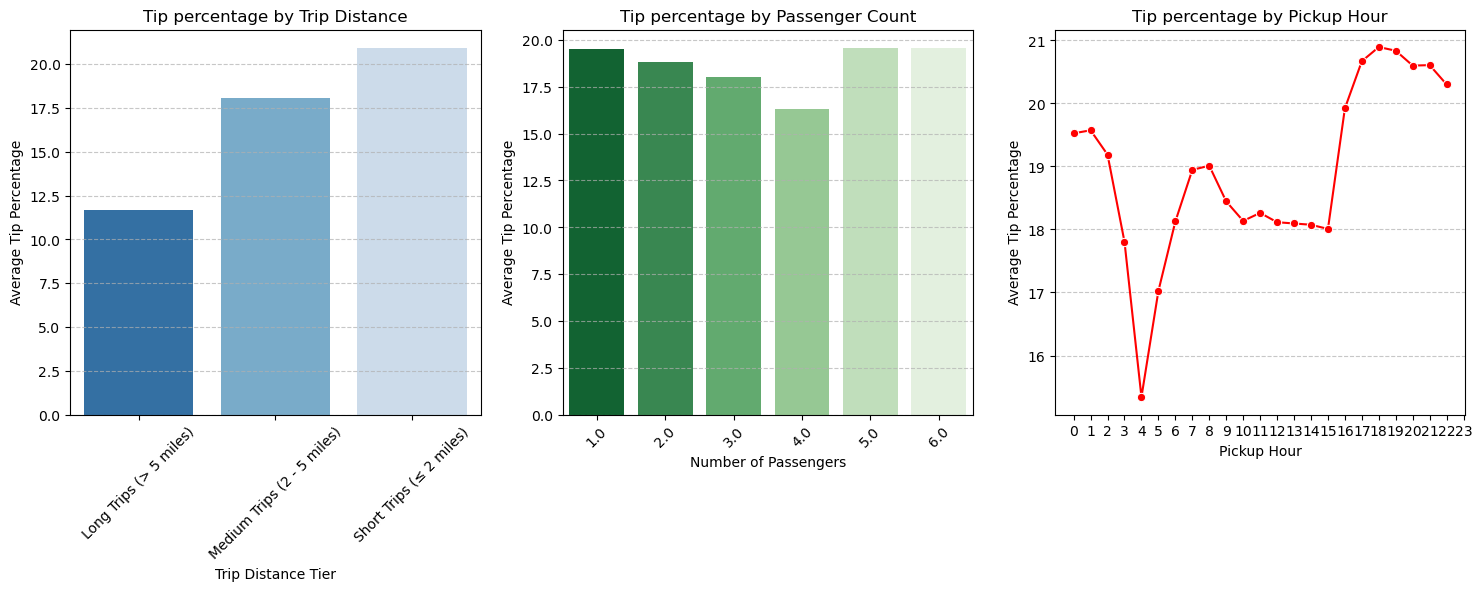

In [488]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
tip_by_distance = df.groupby('distance_tiers')['tip_percentage'].mean().reset_index()
tip_by_passengers = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=ax[0], data=tip_by_distance, x='distance_tiers', y='tip_percentage', palette='Blues_r')
ax[0].set_title("Tip percentage by Trip Distance")
ax[0].set_xlabel("Trip Distance Tier")
ax[0].set_ylabel("Average Tip Percentage")
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='x', rotation=45)


sns.barplot(ax=ax[1], data=tip_by_passengers, x='passenger_count', y='tip_percentage', palette='Greens_r')
ax[1].set_title("Tip percentage by Passenger Count")
ax[1].set_xlabel("Number of Passengers")
ax[1].set_ylabel("Average Tip Percentage")
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=ax[2], data=tip_by_hour, x='pickup_hour', y='tip_percentage', marker='o', color='red')
ax[2].set_title("Tip percentage by Pickup Hour")
ax[2].set_xlabel("Pickup Hour")
ax[2].set_ylabel("Average Tip Percentage")
ax[2].set_xticks(range(0, 24))
ax[2].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Tip Percentage by Trip Distance** <br>
Shorter trips (≤ 2 miles) receive the highest tip percentages.<br>
Medium trips (2-5 miles) have moderate tips.<br>
Long trips (> 5 miles) tend to have the lowest tip percentages.<br>
Passengers may tip more generously on short rides but less on long trips, possibly due to higher overall fares.<br>

**Tip Percentage by Passenger Count** <br>

Solo passengers and groups of 5-6 tend to tip the highest.<br>
Groups of 4 tip slightly lower than others.<br>
 Larger groups might distribute tipping responsibility, leading to slight variations.<br>

**Tip Percentage by Pickup Hour** <br>

Tips drop significantly between 3 AM - 5 AM (possibly due to tired or hurried passengers).<br>
Tips gradually rise during the day and peak around 5 PM - 8 PM.<br>
Evening rides, often leisure or post-work, may result in better tipping behavior.<br>



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

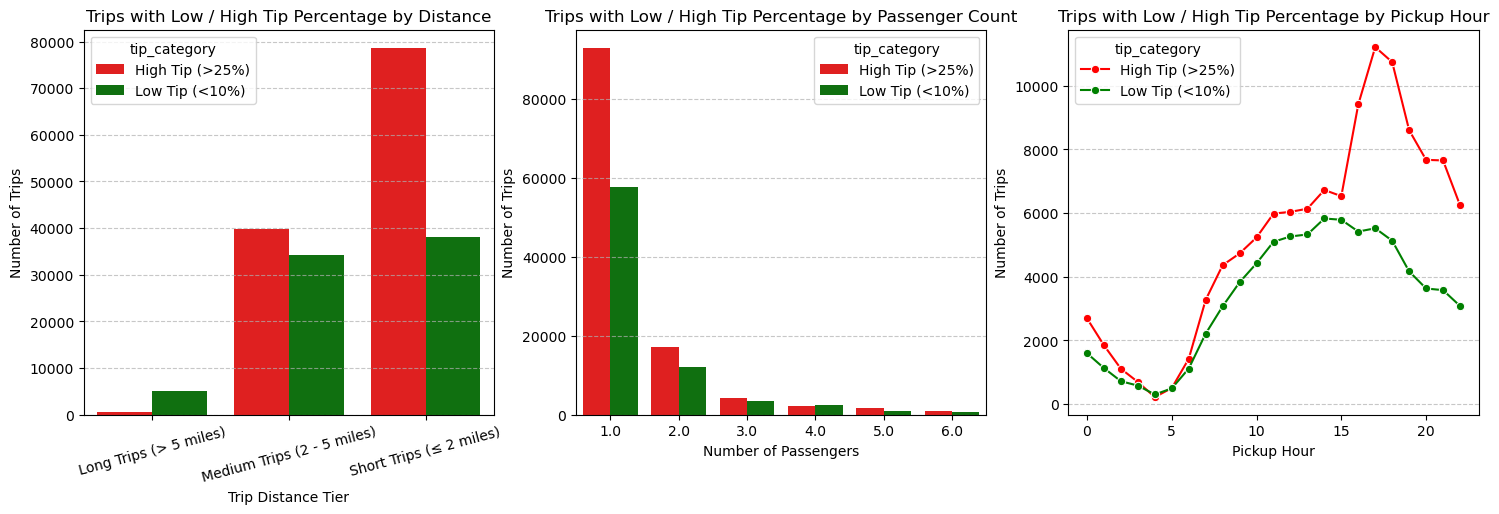

In [502]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tip_category'] = df['tip_percentage'].apply(lambda x: 'Low Tip (<10%)' if x < 10 else ('High Tip (>25%)' if x > 25 else 'Other'))

filtered_df = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

low_high_tip_by_distance = filtered_df.groupby(['distance_tiers', 'tip_category'])['tip_percentage'].count().reset_index()
low_high_tip_by_passengers = filtered_df.groupby(['passenger_count', 'tip_category'])['tip_percentage'].count().reset_index()
low_high_tip_by_hour = filtered_df.groupby(['pickup_hour', 'tip_category'])['tip_percentage'].count().reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=ax[0], data=low_high_tip_by_distance, x='distance_tiers', y='tip_percentage', hue='tip_category', palette=['red', 'green'])
ax[0].set_title("Trips with Low / High Tip Percentage by Distance")
ax[0].set_xlabel("Trip Distance Tier")
ax[0].set_ylabel("Number of Trips")
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='x', rotation=15)

sns.barplot(ax=ax[1], data=low_high_tip_by_passengers, x='passenger_count', y='tip_percentage', hue='tip_category', palette=['red', 'green'])
ax[1].set_title("Trips with Low / High Tip Percentage by Passenger Count")
ax[1].set_xlabel("Number of Passengers")
ax[1].set_ylabel("Number of Trips")
ax[1].grid(axis='y', linestyle='--', alpha=0.7)


sns.lineplot(ax=ax[2], data=low_high_tip_by_hour, x='pickup_hour', y='tip_percentage', hue='tip_category', marker='o', palette=['red', 'green'])
ax[2].set_title("Trips with Low / High Tip Percentage by Pickup Hour")
ax[2].set_xlabel("Pickup Hour")
ax[2].set_ylabel("Number of Trips")
ax[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Trip Distance & Tip Percentage** <br>

Short trips (≤ 2 miles) receive the highest number of high tip (>25%) trips.<br>
Long trips (> 5 miles) tend to have more low tip (<10%) trips, possibly due to higher fares leading to lower tip percentages.<br>

**Passenger Count & Tip Percentage** <br>

Solo riders (1 passenger) contribute to the highest number of both low and high tip trips.<br>
The likelihood of a high tip decreases as the number of passengers increases, suggesting that shared rides may lead to lower tipping.<br>

**Pickup Hour & Tip Percentage**<br>

High tip trips peak in the evening (5 PM - 8 PM), likely due to after-work rides or social outings.<br>
Low tip trips are more frequent in the early morning hours (4 AM - 6 AM) and late at night, possibly due to airport rides or tired passengers.<br>

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

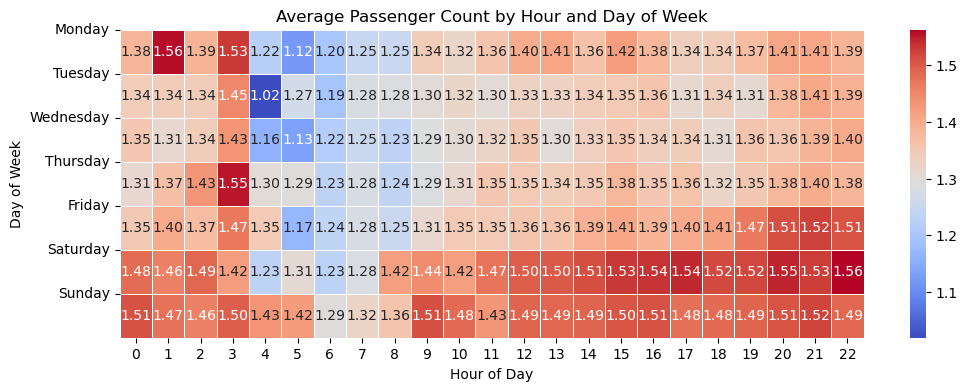

In [525]:
# See how passenger count varies across hours and days

passenger_by_hour_day = df.groupby(['day_of_week', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 4))
sns.heatmap(passenger_by_hour_day, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.yticks(ticks=range(7),labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)
plt.show()




**Peak Passenger Counts on Weekends**<br>
Saturday and Sunday have consistently higher passenger counts throughout the day.<br>
The highest values appear in the late evening and early morning hours.<br>
    
**Early Morning (4 AM - 6 AM) Shows a Drop**<br>
Across all days, passenger counts are lowest during the early morning hours.<br>
Weekdays have a more noticeable dip compared to weekends.<br>

**Weekday Patterns are More Stable**<br>
Monday to Friday show a consistent trend with minor fluctuations.<br>
Passenger counts remain fairly uniform throughout the day.<br>

**Nighttime (Evening Peak on Weekends)**<br>
The highest passenger counts are around 10 PM - 11 PM on Saturdays and Sundays.<br>
This suggests higher demand for transportation services during nightlife hours.<br>

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [551]:
passenger_by_zone 

pickup_zone
Allerton/Pelham Gardens    1.000000
Alphabet City              1.340067
Astoria                    1.550847
Auburndale                 1.000000
Baisley Park               1.000000
                             ...   
Woodlawn/Wakefield         1.000000
Woodside                   1.157895
World Trade Center         1.531250
Yorkville East             1.327963
Yorkville West             1.321954
Name: passenger_count, Length: 225, dtype: float64

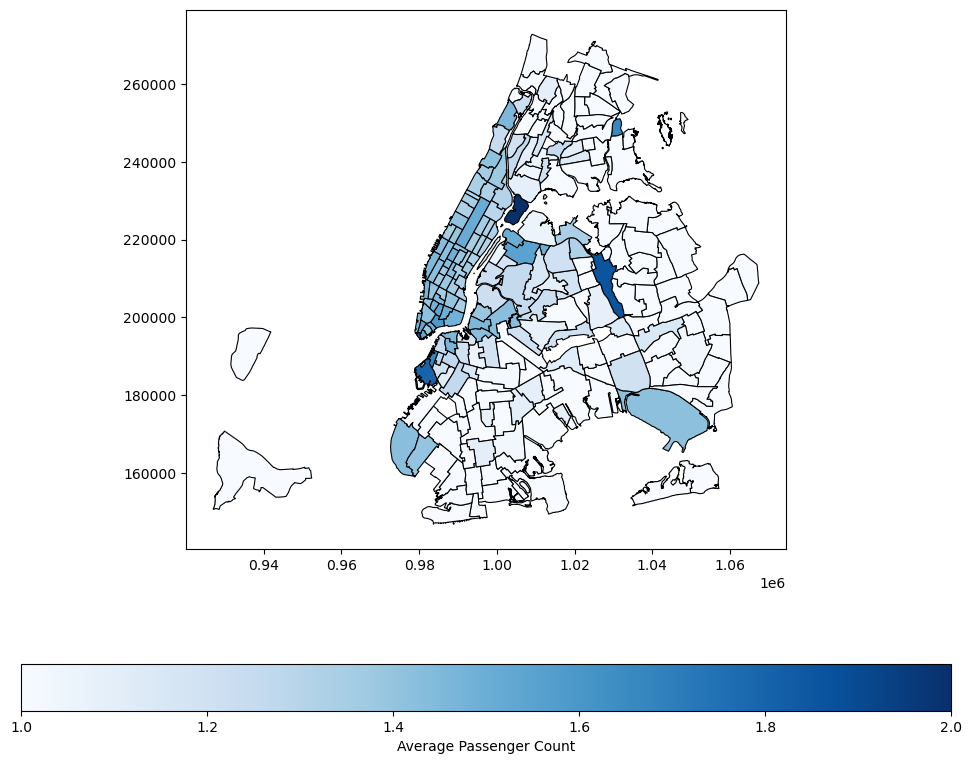

In [595]:
# How does passenger count vary across zones

import geopandas as gpd

geo_df = gpd.read_file(r'C:\Users\Arun\OneDrive\Desktop\upgrad 2025 new\EDA\EDA Assignment\Datasets and Dictionary\taxi_zones\taxi_zones.shp')

passenger_by_zone = df.groupby("pickup_zone")["passenger_count"].mean().reset_index()


geo_df = geo_df.merge(passenger_by_zone,left_on='zone', right_on="pickup_zone", how="left")

fig, ax = plt.subplots(figsize=(12, 10))
geo_df.plot(
    column="passenger_count",  # Column name as a string
    cmap="Blues",  # Color gradient
    linewidth=0.8,  # Border thickness
    edgecolor="black",  # Border color
    legend=True,
    legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"},
    ax=ax
)
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [601]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'month', 'date', 'Airport_fee',
       'pickup_hour', 'drop_hour', 'trip_duration', 'quarter', 'OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'pickup_zone', 'LocationID_x',
       'borough_x', 'geometry_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y',
       'drop_zone', 'LocationID_y', 'borough_y', 'geometry_y',
       'total_pickups_trips', 'day_of_week', 'day_type', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tiers', 'tip_percentage',
       'tip_category'],
      dtype='object')

In [609]:
# How often is each surcharge applied?
df['surcharge']=df['extra']+df['improvement_surcharge']+df['congestion_surcharge']
surcharge_by_zone =df.groupby("pickup_zone")["surcharge"].sum().reset_index()
geo_df = geo_df.merge(surcharge_by_zone,left_on='zone', right_on="pickup_zone", how="left")

geo_df.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'passenger_count_x', 'pickup_zone_y', 'passenger_count_y',
       'passenger_count', 'pickup_zone_x', 'surcharge_x', 'pickup_zone_y',
       'surcharge_y'],
      dtype='object')

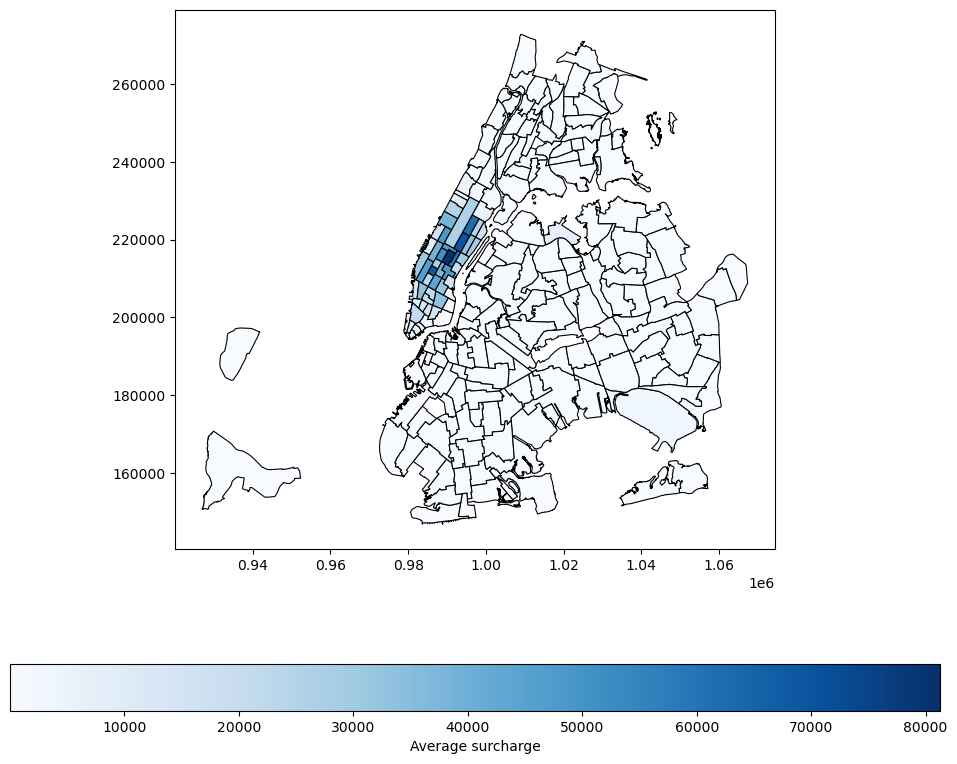

In [611]:
geo_df.drop(columns=['passenger_count_x', 'pickup_zone_y', 'passenger_count_y','pickup_zone_x','pickup_zone_y',
       'surcharge_y'],inplace=True,axis=1)
geo_df.rename(columns={'surcharge_x':'surcharge'},inplace = True)
fig, ax = plt.subplots(figsize=(12, 10))
geo_df.plot(
    column="surcharge",  # Column name as a string
    cmap="Blues",  # Color gradient
    linewidth=0.8,  # Border thickness
    edgecolor="black",  # Border color
    legend=True,
    legend_kwds={'label': "Average surcharge", 'orientation': "horizontal"},
    ax=ax
)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Increase vehicle availability in high-demand zones ( business districts in the morning, nightlife areas at night).<br>
Reduce idle vehicles in low-demand periods to save operational costs.<br>
Allocate more vehicles during rush hours (morning and evening).Adjust fleet size dynamically based on real-time demand predictions.<br>
Use historical trip data to identify routes with the least congestion.Prioritize dispatching vehicles to zones with high ride requests to reduce empty miles.<br>
Offer discounts for pooled rides in high-traffic areas to encourage usage.<br>
Adjust surcharges dynamically during peak hours to balance demand.<br>
Reduce pricing in low-demand hours to encourage ridership. Incentivize drivers to move towards predicted demand zones. 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

***1. Time-Based Dynamic Cab Allocation***
**Morning Rush (6 AM - 10 AM):**<br>
High demand: Business districts, transport hubs (airports, train stations).<br>
Position cabs: Near residential areas to pick up commuters heading to work.<br>
    <br>
**Midday (10 AM - 4 PM):**<br>
Moderate demand: Shopping malls, hospitals, and offices.<br>
Position cabs: Near commercial hubs & tourist spots.<br>
<br>
**Evening Peak (4 PM - 8 PM):**<br>
High demand: Business areas (office workers heading home), transport hubs.<br>
Position cabs: Near office buildings, metro stations, and restaurants.<br>
<br>
**Late Night (8 PM - 2 AM):**<br>
High demand: Entertainment zones, nightclubs, and hotels.<br>
Position cabs: Near bars, event venues, and city centers.<br>
<br>
**Early Morning (2 AM - 6 AM):**<br>
Low demand: Only airport drop-offs, hospital visits.<br>
Position cabs: Near airports and major roads leading to hospitals.<br>
<br>
***2. Day-of-Week-Based Positioning***<br>
<br>
**Weekdays (Monday - Friday):**<br>
Peak hours: Commuter-heavy areas (business districts, transport hubs).<br>
Off-peak: Focus on hospitals, malls, and restaurants.<br>
<br>
**Weekends (Saturday - Sunday):**<br>
Friday Night & Saturday Night: Nightlife & event hotspots.<br>
Sunday Afternoon: Parks, tourist attractions, and malls.<br>
<br>
***3. Monthly & Seasonal Positioning***<br>
 <br>
**Holiday Seasons:**<br>
Festivals & holiday shopping periods → Malls & tourist areas.<br>
`Summer:`<br>
Beaches, theme parks, and outdoor attractions.<br>
`Winter:`<br>
Hotels, indoor attractions, transport hubs (due to increased travel).<br>
<br>
***4. Heatmap-Based Dynamic Cab Deployment***<br>
**Use real-time & historical heatmaps to reposition cabs:**<br>
<br>
 High-density areas: More vehicles assigned.<br>
**Low-demand zones: Reduce idle cabs.**<br>
 Deploy AI-powered forecasting models to adjust cab positions dynamically.<br>
<br>
***5. Reduce Deadhead Miles & Idle Time***<br>
 Encourage cabs to move toward predicted demand areas instead of waiting at random spots.<br>
Use app-based incentives to nudge drivers toward strategic locations (e.g., surge-pricing areas).

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Train models to predict demand hourly, daily, and seasonally based on historical data.<br>
Continuously analyze trip data to refine dispatching and routing algorithms.<br>
Reduced wait times for passengers.<br>
Increased ride efficiency & earnings for drivers.<br>
Better customer satisfaction with smoother service.<br>